# Исследование данных о российском кинопрокате.

Изучение рынка российского кинопроката и выявление текущих трендов.<br>
Изучение фильмов, которые получили государственную поддержку, и зрительского интереса к ним.<br><br>

- **Заказчик исследования:** Министерство культуры Российской Федерации.<br><br>
- **Предмет исследования:** 
  1. Рынок российского кинопроката.
  2. Фильмы с государственной поддержкой.<br><br>
- **Источник данных:** <a href="http://opendata.mkrf.ru/" target=_blank>Портал открытых данных Министерства культуры.</a><br><br>
  
        
- **План работы:**
  1. Знакомство с предоставленнными данными;
  2. Предобработка данных;
  3. Рассчёт дополнительных параметров;
  4. Исследовательский анализ:
    - Оценка рынка российского кинопроката.
    - Оценка эффективности государственной поддержки киноиндустрии.

## Открытие файлов с данными и объединение их в один датафрейм. 

- Откроем файлы, <br>
в том числе, файл с годами производства и типами прокатных удостоверений, предварительно скачанный с портала открытых данных Министерства Культуры, предобработанный, для уменьшения размера, и загруженный в проект через портал google.com/sheets/, в соответствии с правилами Яндекс.Практикум.<br><br>

- Объединим данные таким образом, чтобы 
  - все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм;
  - при объединении, в результирующий датафрейм попали только очищенные объекты дополнительного датасета `mkrf_extra_subset`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

### Импорт используемых библиотек.

In [1]:
# pandas для работы с датафреймами
import pandas as pd
# matplotlib и seaborn для построения графиков
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
# numpy для рассчетов
import numpy as np
# requests и io для получения дополнительного датасета
import requests
from io import BytesIO

### Загрузка датасетов.
- Загрузим датасеты `mkrf_movies.csv`, с данными о прокатных удостоверениях, и `mkrf_shows.csv`, с данными о прокате в российских кинотеатрах, и запишем их в переменные `mkrf_movies` и `mkrf_shows` соответственно.
- Также, загрузим дополнительный датасет `mkrf_extra_subset.csv`, с годами производства и типами прокатных удостоверений, предварительно скачанный с портала открытых данных Министерства Культуры, предобработанный, для уменьшения размера, и загруженный в проект через портал google.com/sheets/, в соответствии с правилами Яндекс.Практикум. Запишем этот датасет в переменную `mkrf_extra_subset`.

In [2]:
# Открываем основные датасеты и записываем их в переменные 
# movies_data и shows_data.
try:
    mkrf_movies = pd.read_csv('./datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('./datasets/mkrf_shows.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
    
# Открываем вспомогательный датасет и записываем его в переменную mkrf_extra_subset
spreadsheet_id = '130-HQIjEN47kzhlY_zwKsJXKSkrUXMWXMTRyGdzdSao'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mkrf_extra_subset = pd.read_csv(BytesIO(r.content))

### Установка параметров визуального отображения элементов.

In [3]:
# Установим стиль отображения заголовков таблиц
styles = [dict(selector='caption',
               props=[('text-align', 'center'),
                      ('font-size', '120%'),
                      ('color', 'black'),
                      ('font-weight', 'bold')])]

# Установим отображение всех столбцов при выводе датафрейма и формат для больших чисел
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

# Установим размер шрифта описания графиков
plt.rcParams['font.size'] = '12'

### Ознакомление с датафреймами.

In [4]:
# Выведем первые 20 строк датафреймов
display(mkrf_movies.head(20))
display(mkrf_shows.head(20))
mkrf_extra_subset.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


,puNumber,box_office
0,111000113,"2,450"
1,111000115,"61,040"
2,111000116,"153,030,013"
3,111000117,"12,260,956"
4,111000118,"163,684,058"
5,111000119,"4,293,650"
6,111000212,200
7,111000216,"355,567"
8,111000313,710
9,111000314,"1,607,970"


,puNumber,production_year,pu_category
0,221006316,2000,Телевидение (неисключительные права)
1,221027814,2006,"Коммерческое видео, Домашнее видео, Телевидение"
2,221048915,2003,Телевидение
3,111013716,1980,Показ фильма в кинозале и прокат фильма на мат...
4,221038416,2008,прокат фильма на материальном носителе
5,221026916,2008,прокат фильма на материальном носителе
6,221030815,2008,Телевидение (неисключительные права)
7,221050013,1957,"Видеоправа(показ и прокат), телевидение"
8,111013816,1982,Показ фильма в кинозале и прокат фильма на мат...
9,111007013,1984,Все права


In [5]:
# Выведем информацию о датафреймах
display(mkrf_movies.info())
display(mkrf_shows.info())
mkrf_extra_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   puNumber         30485 non-null  object
 1   production_year  30413 non-null  object
 2   pu_category      29989 non-null  object
dtypes: object(3)
memory usage: 714.6+ KB


### Обработка дополнительного датасета.
_Т.к. данный дополнительный датасет не будет участвовать в рассчетах и 
понадобится только для дополнения информации о фильмах, удалим из него 
 дубликаты и аномальные значения, не вникая в причины их появления._<br>
 - Проверим датасет на явные дубликаты и дубликаты в столбце `puNumber`, по которому будет производится слияние.
 - Также, проверим столбец `puNumber` на значения содержащие любые символы, кроме цифр.

In [55]:
# Выведем кол-ва дубликатов и строки с аномальными значениями
print("Кол-во явных дубликатов:",
      mkrf_extra_subset.duplicated().sum())

print("\nКол-во дубликатов в столбце `puNumber`:", 
      mkrf_extra_subset['puNumber'].duplicated().sum())

print("\nСтроки с аномальными значениями в столбце puNumber:")
display(mkrf_extra_subset[~(mkrf_extra_subset['puNumber'].str.isdigit())])

print("\nСтроки с аномальными значениями в столбце production_year")
mkrf_extra_subset['production_year'] = mkrf_extra_subset['production_year'].astype('str')
display(mkrf_extra_subset.query('~(production_year.str.isdigit())'))

Кол-во явных дубликатов: 0

Кол-во дубликатов в столбце `puNumber`: 0

Строки с аномальными значениями в столбце puNumber:


AttributeError: Can only use .str accessor with string values!

Удалим дубликаты и аномальные значения и изменим форматы столбцов:
- `puNumber` на `int`;
- `production_year` на `Int64`.

In [7]:
# Очистка от дубликатов
mkrf_extra_subset = mkrf_extra_subset.drop_duplicates(subset=['puNumber'], keep=False)
mkrf_extra_subset = mkrf_extra_subset.drop_duplicates(keep=False)

# Очистка столбцов puNumber, production_year от аномальных значений
mkrf_extra_subset = mkrf_extra_subset.drop(mkrf_extra_subset[~(mkrf_extra_subset['puNumber'].str.isdigit())].index)
for elem in mkrf_extra_subset['production_year']:
    if len(elem) > 4:
        mkrf_extra_subset = (
            mkrf_extra_subset.
            drop(mkrf_extra_subset[mkrf_extra_subset['production_year'] == elem]
                 .index))
        
# Перевод столбцов puNumber, 'production_year' в целочисленный формат для объединения с основным датасетом
mkrf_extra_subset['puNumber'] = mkrf_extra_subset['puNumber'].astype('int')
mkrf_extra_subset['production_year'] = mkrf_extra_subset['production_year'].astype('float').astype('Int64')

# Проверка рез-та
print("Тип столбцов после обработки: ",
      f"\npuNumber - {mkrf_extra_subset['puNumber'].dtype}",
      f"\nproduction_year: {mkrf_extra_subset['production_year'].dtype}")

Тип столбцов после обработки:  
puNumber - int64 
production_year: Int64


#### Выводы:
Были изменены типы столбцов дополнительного датасета `mkrf_extra_subset`. 
- Тип столбца `puNumber`, по которому будет производитья слияние датасетов, изменён на `int64`.
- Тип столбца `production_year`, года производства фильма, изменен на `Int64`.

### Обработка датафрейма `mkrf_movies`.
 Перевод столбца `puNumber` в таблице `mkrf_movies`в целочисленный формат:

In [8]:
# Переведём столбцы puNumber в целочисленный формат:
# mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
# При попытке перевода в численный формат получили ошибку на значении "нет". 


# Выведем строку со значением 'нет'
print("\033[1m" + "Таблица mkrf_movies:" + "\033[0m",
       "\n\n - Строка со значением 'нет' в столбце puNmber:")
display(mkrf_movies[mkrf_movies['puNumber'] == 'нет'])

# Выведем строку с названием фильма со значением 'нет'
print("\n\n - Строки с соотв. названием фильма:")
display(mkrf_movies[mkrf_movies['title'].str.contains('Курбан-роман')])

Таблица mkrf_movies: 

 - Строка со значением 'нет' в столбце puNmber:


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN




 - Строки с соотв. названием фильма:


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Удалим дубликат с пропущенным значением и проверим рез-тат
mkrf_movies = mkrf_movies.drop(index=1797)
mkrf_movies = mkrf_movies.reset_index(drop=True)
print("\nКол-во строк со значением 'нет' в столбце puNmber после удаления: "
        f"{mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'].sum()}")


Кол-во строк со значением 'нет' в столбце puNmber после удаления: 0


In [10]:
# Переведём столбцы в целочисленный формат
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

# Проверим рез-тат
print("Тип столбца puNumber в таблице mkrf_movies после изменения:", 
      mkrf_movies['puNumber'].dtype)

Тип столбца puNumber в таблице mkrf_movies после изменения: int64


#### Выводы:
Был обработан датасет `mkrf_movies`. 
- Удален дубликат строки со значением "нет" в столбце `punumber`.
- Тип столбца `puNumber`, по которому будет производитья слияние датасетов, изменён на `int64`.

### Объединение датасетов.
- Объединим датасеты и проверим результат.

In [11]:
# Объединим датасеты и запишем результат в переменную
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data = data.merge(mkrf_extra_subset, on='puNumber', how='left')

#----------Старый код
# # Проверим кол-во добавленных записей в столбце box_office
# print("Кол-во неперенесённых значений: ", f"{shows_data['puNumber'].count() - (~(data['box_office'].isna())).sum()}")
#----------

# Проверим вхождение всех объектов из датасета mkrf_movies в получившийся датафрей data
if (mkrf_movies['title'] == data['title']).sum() == mkrf_movies['title'].count():
    print("Все объекты из датасета mkrf_movies вошли в результирующий датaфрейм data.")

Все объекты из датасета mkrf_movies вошли в результирующий датaфрейм data.


#### Выводы:
- Датасеты `mkrf_movies`, `mkrf_shows` и `mkrf_extra_subset` были объединены с использованием функции `merge` в режиме объединения `left` и записаны в переменную `data`. 
- Проверка показала, что все объекты из датасета `mkrf_movies` вошли в результирующий датафрейм `data`.

### Проверка данных на  дубликаты.

In [12]:
print(f"Кол-во явных дубликатов: {data.duplicated().sum()}")
print("\nКол-ва неявных дубликатов:")
len(data) - data.nunique()

Кол-во явных дубликатов: 0

Кол-ва неявных дубликатов:


title                     714
puNumber                    2
show_start_date          5521
type                     7477
film_studio              1995
production_country       6535
director                 2674
producer                 2136
age_restriction          7480
refundable_support       7451
nonrefundable_support    7410
budget                   7195
financing_source         7482
ratings                  7391
genres                   6743
box_office               4547
production_year          7403
pu_category              7277
dtype: int64

#### Выводы:
Данные были проверены на дубликаты.
- Явные дубликаты отутствуют. 
- Присутствует большое кол-во неявных дубликатов. Обработаем их в соответствующем разделе.

### Предварительный анализ результирующего датафрейма.

In [13]:
display(data.head(20))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_year,pu_category
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2003,Телевидение
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,1980,Показ фильма в кинозале и прокат фильма на мат...
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2008,прокат фильма на материальном носителе
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2008,прокат фильма на материальном носителе
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2008,Телевидение (неисключительные права)
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,1982,Показ фильма в кинозале и прокат фильма на мат...
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700",1984,Все права
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2005,"Домашнее видео, Телевидение"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2008,Все права
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,1981,Все права


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [15]:
display(data.describe())
data.describe(include='object')

,puNumber,refundable_support,nonrefundable_support,budget,box_office,production_year
count,"7,485",332,332,332,"3,158","7,339"
mean,"135,196,588","11,864,458","48,980,989","127,229,717","76,478,696","2,011"
std,"38,352,919","24,916,555","59,980,118","188,588,333","240,353,123",11
min,"1,811,096",0,0,0,0,"1,921"
25%,"112,025,118",0,"25,000,000","42,000,000","86,239","2,010"
50%,"121,015,510",0,"30,000,000","68,649,916","2,327,988","2,013"
75%,"124,003,314","15,000,000","40,375,000","141,985,320","23,979,671","2,017"
max,"231,001,111","180,000,000","400,000,000","2,305,074,303","3,073,568,691","2,019"


,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,financing_source,ratings,genres,pu_category
count,7485,7485,7485,7467,7483,7476,6917,7485,332,6519,6510,7276
unique,6771,1964,8,5490,950,4811,5349,5,3,94,742,208
top,День святого Валентина_,2010-12-17T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",США,О.Семёнова,П.Смирнов,«16+» - для детей старше 16 лет,Министерство культуры,6.6,драма,"Показ фильма в кинозале, прокат фильма на мате..."
freq,5,96,4519,341,2172,47,67,2851,164,312,476,1594


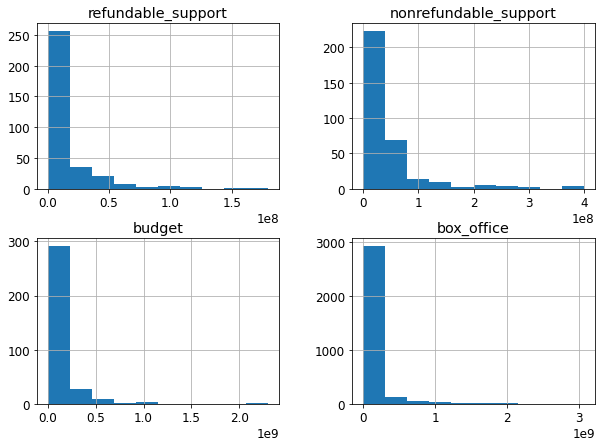

In [16]:
# Гистограммы столбцов с количественными значениями
columns_quant = ['refundable_support', 
                 'nonrefundable_support', 
                 'budget', 'box_office']

data[columns_quant].hist(figsize=(10, 7));

### Предварительная проверка столбцов на проблемные значения.

In [17]:
# Выведем первые 10 уникальных значений всех столбцов
for column in data:
    display(column, data[column].unique()[:10])

'title'

array(['Открытый простор', 'Особо важное задание', 'Особо опасен',
       'Остановился поезд', 'Любовь и голуби', 'Любовь и сигареты',
       'Отпетые мошенники.', 'Отпуск за свой счет',
       'Превосходство Борна /По одноименной новелле Роберта Ладлэма/',
       'Ответный ход'], dtype=object)

'puNumber'

array([221048915, 111013716, 221038416, 221026916, 221030815, 111013816,
       111007013, 221074614, 121011416, 111019114])

'show_start_date'

array(['2015-11-27T12:00:00.000Z', '2016-09-13T12:00:00.000Z',
       '2016-10-10T12:00:00.000Z', '2016-06-10T12:00:00.000Z',
       '2015-07-29T12:00:00.000Z', '2013-10-18T12:00:00.000Z',
       '2014-12-29T12:00:00.000Z', '2016-05-05T12:00:00.000Z',
       '2014-12-01T12:00:00.000Z', '2016-06-29T12:00:00.000Z'],
      dtype=object)

'type'

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

'film_studio'

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
       'Пульсар Продюксьон, ТФ1 Фильм ',
       'Киностудия "Мосфильм", Телевидение ВНР',
       'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
       'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
       'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
       'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс'],
      dtype=object)

'production_country'

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания'], dtype=object)

'director'

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили'], dtype=object)

'producer'

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит',
       'Джон Пенотти, Джон Туртурро', 'Патрис Леду',
       'Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг',
       'Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис',
       'Саймон Чэннинг Уильямс', 'Этчи Стро, Анни Стюарт, Майк Фиггис',
       'Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн'],
      dtype=object)

'age_restriction'

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

'refundable_support'

array([      nan,        0., 50000000., 26000000., 30000000., 15000000.,
       10000000., 20000000.,  7153119., 25000000.])

'nonrefundable_support'

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07])

'budget'

array([           nan, 7.94119000e+07, 3.71428570e+07, 1.76023490e+08,
       4.05741400e+07, 4.00151220e+07, 5.18500000e+07, 2.20588394e+08,
       8.62100670e+07, 1.39551503e+08])

'financing_source'

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

'ratings'

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0'], dtype=object)

'genres'

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт'], dtype=object)

'box_office'

array([   nan,  2700.,   360.,   420.,   380.,  1165., 22660., 84720.,
        1795.,   300.])

'production_year'

<IntegerArray>
[2003, 1980, 2008, 1982, 1984, 2005, 1981, 2004, 2001, 1964]
Length: 10, dtype: Int64

'pu_category'

array(['Телевидение',
       'Показ фильма в кинозале и прокат фильма на материальном носителе',
       'прокат фильма на материальном носителе',
       'Телевидение (неисключительные права)', 'Все  права',
       'Домашнее видео, Телевидение', 'Все права',
       'Коммерческое видео, Домашнее видео, Телевидение',
       'Публичное видео, Домашнее видео, Телевидение',
       'Телевидение, Показ фильма другими техническими способами'],
      dtype=object)

В столбце `type` обнаружены значения с пробелами в началах строк. Проверим все категориальные столбцы на наличие пробелов в концах и началах строк.

In [18]:
# Функция для проверки пробелов в началах/концах строк категориальных столбцов
columns_cat = ['title', 'type', 'film_studio', 
               'production_country', 'director', 'producer',
               'financing_source', 'age_restriction', 
               'ratings', 'genres']


def count_spaces(columns_with_spaces):
    print('Пробелов в началах/концах строк в столбцах:')
    for column in columns_with_spaces:
        i = 0
        for elem in data.loc[~(data[column].isna()), column].unique():
            if (len(elem.strip()) - len(elem)) < 0:
                i += 1
        print(column,'-', i)
        
count_spaces(columns_cat)

Пробелов в началах/концах строк в столбцах:
title - 18
type - 2
film_studio - 356
production_country - 34
director - 42
producer - 129
financing_source - 0
age_restriction - 0
ratings - 0
genres - 0


Удалим найденные пробелы в началах и концах строк.

In [19]:
# Удалим найденные пробелы в началах/концах строк и проверим рез-тат
data[columns_cat] = data[columns_cat].apply(lambda x: x.str.strip())
count_spaces(columns_cat)

Пробелов в началах/концах строк в столбцах:
title - 0
type - 0
film_studio - 0
production_country - 0
director - 0
producer - 0
financing_source - 0
age_restriction - 0
ratings - 0
genres - 0


#### Выводы:
Была проведена предварительная проверка датафрейма на аномальные значения.
- Были обнаружены и удалены пробелы в началах и концах строк категориальных столбцов.

### Описание столбцов для справки:
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.
- `box_office` — сборы в рублях;
- `production_year` - год производства;
- `pu_category` - категория прокатного удостоверения.

### Предварительные выводы по составу датафрейма:
- Датасет содержит данные по 7484-ти прокатным удостоверениям для фильмов, каждый из которых описывается 16-ю характеристиками (4 количественных, 11 категориальных и 1 временная).<br>


- При проведении предварительного анализа датасетов были проведены следующие действия:
  - Изменены типы столбцов дополнительного датасета `mkrf_extra_subset`. 
    - Тип столбца `puNumber`, по которому будет производитья слияние датасетов, изменён на `int64`.
    - Тип столбца `production_year`, года производства фильма, изменен на `Int64`.
  - Был обработан датасет `mkrf_movies`. 
    - Удален дубликат строки со значением "нет" в столбце `punumber`.
    - Тип столбца `puNumber`, по которому будет производитья слияние датасетов, изменён на `int64`.
    - Датасеты `mkrf_movies`, `mkrf_shows` и `mkrf_extra_subset` были объединены с использованием функции `merge` в режиме объединения `left` и записаны в переменную `data`.
  - Данные были предварительно проверены на дубликаты.
    - Явные дубликаты отутствуют. 
    - Присутствует большое кол-во неявных дубликатов. Обработаем их в соответствующем разделе.
  - Была проведена предварительная проверка датафрейма на аномальные значения.
    - Были обнаружены и удалены пробелы в началах и концах строк категориальных столбцов.


- Особенности данных:
  - почти во столбцах присутствуют списки значений, в т.ч. неполные и с повторами:
    - `film_studio`;
    - `director`;
    - `producer`;
    - `financing_source`;
    - `genres`;
  - пропуски в столбцах:
    - `film_studio`;
    - `production_country`;
    - `director`;
    - `producer`;
    - `ratings`;
    - `genres`;
  - ограниченные данные для столбцов:<br>
    (вывод в сводные таблицы)
    - `refundable_support`;
    - `nonrefundable_support`;
    - `budget`;
    - `financing_source`;
    - `box_office`;
  - неверные типы данных:
    - `puNumber` изменен на `int`;
    - `show_start_date` изменим на `datetime`;
    - `ratings` изменим на `float`;
  - пробелы в началах и/или концах строковых значений ячеек в столбцах:<br>
  _(Удалены.)_
    - `title`;
    - `type`;
    - `film_studio`;
    - `production_country`;
    - `director`;
    - `producer`
  - повторы значений в разных комбинациях:
    - `film_studio`;
    - `production_country`;
    - `genres`;
  - аномальные значения:
    - `box_office`;
  - некорректные названия столбцов:
    - `puNumber`;
    - `ratings`;
    - `genres`.

## Предобработка данных.

###  Проверка типов данных.

Заменим типы данных в следующих столбцах:
- `show_start_date` оставим только дату и заменим на `datetime`, т.к. время не указано;
- `ratings` заменим на `float`, т.к. в оценках должны быть только цифры или`NaN`.

#### Перевод show_start_date в datetime.

In [20]:
# Переведём show_start_date в datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S').dt.round('D')
print(f"Новый формат столбца 'show_start_date': {data['show_start_date'].dtype}")

Новый формат столбца 'show_start_date': datetime64[ns, UTC]


#### Замена типа столбца `ratings` на float.

In [21]:
# ----------Старый код
# Переведём ratings в формат float
# data['ratings'] = data['ratings'].astype('float')
# При попытке перевода получаем ошибку на значении "99%".

# # Переведём все значения из формата процентов в 10-ти бальный
# data['ratings'] = data['ratings'].str.replace('%', '').astype('float')
# data.loc[data['ratings'] > 10, 'ratings'] = data.loc[data['ratings'] > 10, 'ratings'] / 10
# ----------

# Выведем записи со значениями рейтингов не в 10-бальной системе
print("Кол-во записей со значениями рейтингов не в 10-бальной шкале:",
      data.query('ratings.notna() and ' 
                        + 'ratings.str.contains("%")')['ratings'].count(),
      ".")
print("\n\nЗаписи со значениями рейтингов не в 10-бальной шкале.")
display(data.query('ratings.notna() and ratings.str.contains("%")'))

Кол-во записей со значениями рейтингов не в 10-бальной шкале: 29 .


Записи со значениями рейтингов не в 10-бальной шкале.


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,production_year,pu_category
259,Прошлое,221030715,2015-07-30 00:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN,2007,Телевидение (неисключительные права)
811,От винта!,114000212,2012-08-06 00:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740",2012,Все права
1053,Песочный человек,121029212,2012-11-30 00:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN,2011,"Театральный, Нетеатральный, Публичное видео, Д..."
1341,Сказка о добре и Вре,111008913,2013-11-15 00:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN,2013,Все права
1804,Спираль.,111001014,2014-01-30 00:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295",2014,Все права
1873,Короткие истории о любви 2,121002615,2015-02-14 00:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859",<NA>,NaN
1898,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-28 00:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,558",2015,Театральный
2125,Поездка к матери,111002015,2015-03-02 00:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0,2014,Все права
2145,Главный,111003415,2015-03-28 00:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0,"10,000,000","40,000,000",Министерство культуры,94%,"фантастика,боевик,комедия","334,750",2015,Все права
2437,Самый рыжий Лис,111012715,2015-07-30 00:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN,2015,Все права


Т.к. рейтинги, указанные не в 10-бальной шкале, не соответствуют рейтингу "Кинопоиска", который указан для остальных данных, и таких записей немного (29), удалим эти записи за исключением одной, для которой указана сумма поддержки и рейтинг на сайте "Кинопоиска". Заменим значение рейтинга этой записи на соответствующий "Кинопоиска".

In [22]:
# Заменим рейтинг фильма, для которого указана сумма поддержки и бюджета
data.loc[2145, 'ratings'] = '5.8'
print("Кол-во записей со значениями рейтингов не в 10-бальной шкале после замены:",
      data.query('ratings.notna() and ratings.str.contains("%")')['ratings'].count())

Кол-во записей со значениями рейтингов не в 10-бальной шкале после замены: 28


In [23]:
# Удалим записи со значениями рейтингов не в 10 бальной системе
data = data.drop(data[(data['ratings'].notna()) & (data['ratings'].str.contains('%'))].index)
print("Кол-во записей со значениями рейтингов не в 10-бальной шкале после удаления:",
      data[(data['ratings'].notna()) & (data['ratings'].str.contains('%'))].shape[0])

# Изменим тип столбца
data['ratings'] = data['ratings'].astype('float')

# Выведем новый тип и мин. / макс. балл
print(f"Новый формат столбца 'ratings': {data['ratings'].dtype}.")
print("Мин. / Макс. значения в столбце 'ratings': ",
      f"{data['ratings'].min()} / {data['ratings'].max()}.")

Кол-во записей со значениями рейтингов не в 10-бальной шкале после удаления: 0
Новый формат столбца 'ratings': float64.
Мин. / Макс. значения в столбце 'ratings':  1.0 / 9.2.


#### Выводы:
- Были удалены 28 записей, содержащих рейтинги в не 10-бальном формате. Значение рейтинга в одной записи было изменено на рейтинг "Кинопоиска".
- Были изменены типы данных в столбцах:
  - `show_start_date` на `datetime`;
  - `ratings` на `float`.

### Переименование столбцов.
Переименуем неккоректно названные столбцы:
- `puNumber` - смесь латиницы и английского и "верблюжий" регистр;
- `ratings`, `genres` - мн. число;
- `pu_category`, смесь латиницы и английского;.

In [24]:
# Переименование столбцов
data = data.rename(columns={'puNumber' : 'cert_number',
                            'ratings' : 'rating',
                            'genres' : 'genre',
                            'pu_category' : 'cert_category'})
data.columns

Index(['title', 'cert_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'rating', 'genre', 'box_office', 'production_year',
       'cert_category'],
      dtype='object')

#### Выводы:
Были переименованы следующие столбцы:
- `puNumber` на `cert_number`;
- `ratings` на `'rating`;
- `genres` на `genre`;
- `pu_category` на `cert_category`.

### Изучение пропусков в датафрейме.

- Опишем пропуски и объясним, почему заполнили их определённым образом или почему не стали этого делать.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7457 non-null   object             
 1   cert_number            7457 non-null   int64              
 2   show_start_date        7457 non-null   datetime64[ns, UTC]
 3   type                   7457 non-null   object             
 4   film_studio            7439 non-null   object             
 5   production_country     7455 non-null   object             
 6   director               7448 non-null   object             
 7   producer               6889 non-null   object             
 8   age_restriction        7457 non-null   object             
 9   refundable_support     331 non-null    float64            
 10  nonrefundable_support  331 non-null    float64            
 11  budget                 331 non-null    float64          

- Выведем доли пропусков от общего кол-ва записей по годам в виде таблицы и тепловой карты для поиска возможных тенденций.

,film_studio,director,producer,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office
show_start_year,,,,,,,,,,
2010,0.1%,0.51%,4.07%,100.0%,100.0%,100.0%,100.0%,7.42%,7.42%,89.33%
2011,0.0%,0.32%,2.42%,100.0%,100.0%,100.0%,100.0%,7.41%,7.41%,82.45%
2012,0.0%,0.17%,4.42%,100.0%,100.0%,100.0%,100.0%,7.82%,7.82%,78.57%
2013,0.0%,0.16%,14.08%,99.68%,99.68%,99.68%,99.68%,7.44%,7.44%,70.73%
2014,0.12%,0.0%,23.51%,98.01%,98.01%,98.01%,98.01%,8.08%,8.08%,65.42%
2015,0.0%,0.0%,11.02%,87.84%,87.84%,87.84%,87.84%,11.87%,11.87%,34.05%
2016,0.0%,0.0%,6.64%,92.5%,92.5%,92.5%,92.5%,12.55%,12.79%,35.67%
2017,0.0%,0.0%,6.76%,91.85%,91.85%,91.85%,91.85%,13.72%,13.92%,29.22%
2018,1.35%,0.0%,1.58%,93.69%,93.69%,93.69%,93.69%,26.13%,26.13%,46.62%


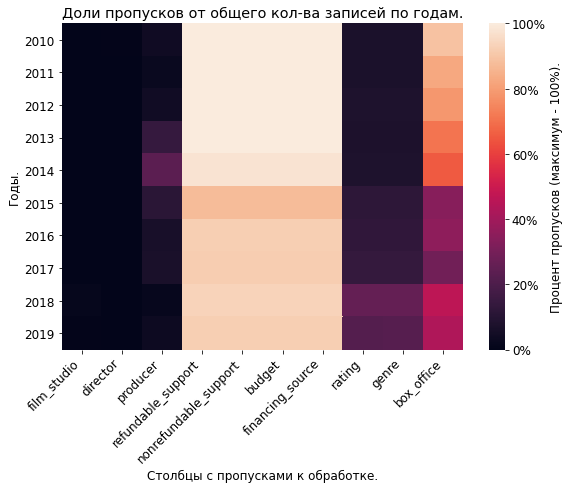

In [26]:
# Выделим год премьеры в отдельный столбец для наглядности анализа пропусков
data['show_start_year'] = data['show_start_date'].dt.year

# Введем переменную, содержащую срез с записями, содержащими пропуски
data_lim = data[['film_studio', 'director', 'producer', 
                 'refundable_support', 'nonrefundable_support', 
                 'budget', 'financing_source', 'rating', 
                 'genre', 'box_office']]
data_lim_nan = data_lim.isna()

# Добавим год премьеры в срез
data_lim_nan['show_start_year'] = data['show_start_year']

# Сгруппируем записи по годам, переведём значения в проценты и выведем таблицу и график
data_lim_nan_perc = round(
    data_lim_nan.groupby('show_start_year').agg(sum) / 
    data_lim_nan.groupby('show_start_year').agg(len) * 100
                         , 2)
display(data_lim_nan_perc.apply(lambda x: x.astype(str) + '%')
       .style.set_caption("Доли пропусков от общего кол-ва записей по годам.")
            .set_table_styles(styles))

fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data_lim_nan_perc, cbar_kws={'label' : 'Процент пропусков (максимум - 100%).',
                                         'format': '%.0f%%'})
plt.xticks(rotation=45,  ha='right')
plt.title('Доли пропусков от общего кол-ва записей по годам.')
plt.xlabel('Столбцы с пропусками к обработке.')
plt.ylabel('Годы.')
plt.yticks(rotation=0,  ha='right')
plt.show()

#### Предварительный вывод:
Пропусков в количественных столбцах больше всего с 2010 по 2014 гг. Это, вероятно, с одной стороны, связано с ограничениями выборки, с другой, с постепенным развертыванием гос. поддержки киноиндустрии начиная с 2010г.<br>

Пропуски в качественных столбцах не демонстрируют какой-либо тенденции.

In [27]:
# Пропуски в film_studio
print("\nДоля пропусков в film_studio:", 
      "{:.2%}".format(data['film_studio'].isna().mean()))
display(data[data['film_studio'].isna()])


Доля пропусков в film_studio: 0.24%


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
1293,Stars in Shorts,121011114,2014-06-03 00:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,комедия,NaN,<NA>,NaN,2014
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 00:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4,"мультфильм,комедия",NaN,<NA>,Домашнее видео,2010
6104,Значит любит,111013818,2018-08-11 00:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2018
6180,Несейка. Младшая дочь,112007018,2018-09-02 00:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2018
6378,Ян Антонышев,112011818,2018-11-15 00:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2018
6379,Ян Антонышев,112011918,2018-11-15 00:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2018
6398,Доживем до каникул?..,111021918,2018-11-15 00:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225",2018,"Показ фильма в кинозале, прокат фильма на мате...",2018
6484,До и После,112014418,2018-12-05 00:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,криминал,детектив",NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2018
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 00:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2018
6496,Мой папа Чингисхан,112014918,2018-12-07 00:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2018


In [28]:
# Пропуски в production_country
display(data[data['production_country'].isna()])

# Заполним пропуски значением "Россия", проверенным в сети интернет
data['production_country'] = data['production_country'].fillna('Россия')
print(f"Кол-во пропусков после замены {data['production_country'].isna().sum()}")

,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 00:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7,"детский,комедия","194,527",2016,Все права,2016
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 00:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4,"мультфильм,комедия",NaN,<NA>,Домашнее видео,2010


Кол-во пропусков после замены 0


In [29]:
# Пропуски в director
display(data[data['director'].isna()])

# Почти все фильмы с незаполненнымы полями "режиссер" и "жанр"
# относятся к "концертам" и могут не иметь режиссера. 
# Заполним поля "жанр" для таких фильмов.
data.loc[data['director'].isna(), 'genre'] = data.loc[data['director'].isna(), 
                                                      'genre'].fillna('концерт,музыка')
data.loc[1735, 'genre'] = 'NaN'
# Проверим рез-тат.
data[data['director'].isna()]

,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 00:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350",2011,Театральный,2012
1735,Помпеи. Британский музей,126003413,2013-09-12 00:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,Театральный,2013
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 00:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,"Домашнее видео, телевидение (неисключительные...",2010
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-23 00:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,Все права (неисключительные права),2010
4297,Изге Вэли (Святой Валентин),217020610,2010-05-21 00:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,"Домашнее видео, телевидение (неисключительные...",2010
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 00:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8,"концерт,музыка",NaN,2010,Театральный,2010
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 00:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4,"мультфильм,комедия",NaN,<NA>,Домашнее видео,2010
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-26 00:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,Театральный,2011
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-12 00:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7,"концерт,музыка",NaN,2011,Театральный,2011


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 00:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,"концерт,музыка","44,350",2011,Театральный,2012
1735,Помпеи. Британский музей,126003413,2013-09-12 00:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,Театральный,2013
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 00:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,"концерт,музыка",NaN,2010,"Домашнее видео, телевидение (неисключительные...",2010
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-23 00:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,"концерт,музыка",NaN,2010,Все права (неисключительные права),2010
4297,Изге Вэли (Святой Валентин),217020610,2010-05-21 00:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,"концерт,музыка",NaN,2010,"Домашнее видео, телевидение (неисключительные...",2010
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 00:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8,"концерт,музыка",NaN,2010,Театральный,2010
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 00:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4,"мультфильм,комедия",NaN,<NA>,Домашнее видео,2010
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-26 00:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,"концерт,музыка",NaN,2009,Театральный,2011
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-12 00:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7,"концерт,музыка",NaN,2011,Театральный,2011


In [30]:
# Пропуски в producer

# Выведем общее кол-во пропусков и кол-во для СССР 
print(f"\nОбщее кол-во пропусков в столбце 'producer': {data['producer'].isna().sum()}")
print("\nФильмы с пропусками, снятые не в СССР:", 
      data.loc[(data['producer'].isna()) &
               ~(data['production_country'].str.contains('СССР')), 
               'producer'].isna().sum())
print("~" * 50)
print("\033[1m", "\n\nФильмы с пропусками в столбце 'producer', снятые в СССР",
      "(", data.loc[(data['producer'].isna()) &
               (data['production_country'].str.contains('СССР')), 
               'producer'].isna().sum(),
      ").", "\033[0m")     


# Первые 10 строк с пропусками
display(data[data['producer'].isna()].head(10))


Общее кол-во пропусков в столбце 'producer': 568

Фильмы с пропусками, снятые не в СССР: 174
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 

Фильмы с пропусками в столбце 'producer', снятые в СССР ( 394 ). 


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
1,Особо важное задание,111013716,2016-09-14 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,военный",NaN,1980,Показ фильма в кинозале и прокат фильма на мат...,2016
5,Остановился поезд,111013816,2016-09-14 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,NaN,1982,Показ фильма в кинозале и прокат фильма на мат...,2016
6,Любовь и голуби,111007013,2013-10-18 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия","2,700",1984,Все права,2013
9,Отпуск за свой счет,111019114,2014-12-02 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",NaN,1981,Все права,2014
11,Ответный ход,111019014,2014-12-02 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"боевик,драма,приключения",NaN,1981,Все права,2014
15,Председатель,111014916,2016-09-14 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,драма,NaN,1964,Показ фильма в кинозале и прокат фильма на мат...,2016
16,Осенний марафон,111007513,2013-10-18 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8,"драма,мелодрама,комедия",NaN,1979,Все права,2013
17,Осень,111027914,2014-12-24 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Смирнов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,"драма,мелодрама",NaN,1974,Все права,2014
18,Неподдающиеся,111003616,2016-02-13 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",360,1959,Все права,2016
19,Неподсуден,111003716,2016-02-13 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,420,1969,Все права,2016


In [31]:
# Пропуски в ratings
print("Доля пропусков в rating", 
      "{:.2%}".format(data['rating'].isna().mean()))

Доля пропусков в rating 12.95%


In [32]:
# Пропуски в genres
print("Доля пропусков в genre", 
      "{:.2%}".format(data['genre'].isna().mean()))

Доля пропусков в genre 12.95%


In [33]:
# Пропуски в box_office
print("Доля пропусков в box_office", 
      "{:.2%}".format(data['box_office'].isna().mean()))

# Выведем пропуски в значениях столбца box_office при заполненных значениях
# столбца budget и запишем индексы в переменную
print("\033[1m" + "\n\nСтроки с пропусками в значениях столбца box_office",
      "при заполненных значениях столбца budget",
      f"({data.query('~(budget.isna()) and box_office.isna()').shape[0]})." + "\033[0m")
display(data.query('~(budget.isna()) and box_office.isna()'))
bo_per_budget_indicies = data.query('~(budget.isna()) and box_office.isna()').index

Доля пропусков в box_office 57.84%


Строки с пропусками в значениях столбца box_office при заполненных значениях столбца budget (14).


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
2799,Золотая рыбка (2015),111018715,2015-10-30 00:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0,"25,000,000","41,998,984",Министерство культуры,6,драма,NaN,2015,Все права,2015
3336,Любовь и Сакс,111001217,2017-02-17 00:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0,"10,000,000","61,000,000",Министерство культуры,5,мелодрама,NaN,2017,"Показ фильма в кинозале, прокат фильма на мате...",2017
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 00:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0,"11,520,000","18,706,080",Министерство культуры,7,"мультфильм,приключения,детектив",NaN,2016,Исключительные права: показ фильма в кинозале ...,2016
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 00:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0,"25,000,000","44,600,000",Министерство культуры,7,"детский,комедия",NaN,2017,"Показ фильма в кинозале, прокат фильма на мате...",2017
6475,Зима,111023518,2019-03-15 00:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0,"25,000,000","39,700,000",Министерство культуры,5,"драма,криминал",NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
6708,Мальчик русский,111002619,2019-02-21 00:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,NaN,«12+» - для детей старше 12 лет,0,"30,000,000","46,941,140",Министерство культуры,6,"драма,военный,история",NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
6967,Танец с саблями,111008619,2019-05-30 00:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0,"40,000,000","61,571,449",Министерство культуры,6,"драма,история,биография",NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
7008,Куратор,111010019,2019-06-13 00:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0,"25,000,000","60,668,576",Министерство культуры,5,"драма,криминал,детектив",NaN,2019,"Показ фильма в кинозале, прокат фильма на мате...",2019
7179,Байкал - Сердце мира 3D,112004619,2019-11-02 00:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0,"3,000,000","33,000,000",Министерство культуры,8,семейный,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
7228,На Луне,111015519,2019-11-02 00:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0,"35,000,000","57,876,000",Министерство культуры,7,"приключения,триллер",NaN,2019,"Показ фильма в кинозале, прокат фильма на мате...",2019


In [34]:
# Заполним пропуски данными из базы "Фонда Кино" в значениях столбца box_office
# при заполненных значениях столбца budget
data.loc[2799, 'box_office'] = 3150
data.loc[3336, 'box_office'] = 57357
data.loc[5660, 'box_office'] = 300
data.loc[6475, 'box_office'] = 852330
data.loc[6708, 'box_office'] = 1089529
data.loc[6967, 'box_office'] = 1411153
data.loc[7008, 'box_office'] = 182099
data.loc[7228, 'box_office'] = 1110536
data.loc[7343, 'box_office'] = 1126854
data.loc[7473, 'box_office'] = 963491807
data.loc[7475, 'box_office'] = 55040
data.loc[7477, 'box_office'] = 521766993

# Проверим рез-тат по индексам пропусков в значениях столбца box_office 
# при заполненных значениях столбца budget
print("\033[1m" + "\nСтроки с пропусками в значениях столбца box_office",
      "при заполненных значениях столбца budget после замены",
      f"({data.query('~(budget.isna()) and box_office.isna()').shape[0]})." + "\033[0m")
data.loc[bo_per_budget_indicies]


Строки с пропусками в значениях столбца box_office при заполненных значениях столбца budget после замены (2).


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
2799,Золотая рыбка (2015),111018715,2015-10-30 00:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0,"25,000,000","41,998,984",Министерство культуры,6,драма,"3,150",2015,Все права,2015
3336,Любовь и Сакс,111001217,2017-02-17 00:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0,"10,000,000","61,000,000",Министерство культуры,5,мелодрама,"57,357",2017,"Показ фильма в кинозале, прокат фильма на мате...",2017
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 00:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0,"11,520,000","18,706,080",Министерство культуры,7,"мультфильм,приключения,детектив",NaN,2016,Исключительные права: показ фильма в кинозале ...,2016
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 00:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0,"25,000,000","44,600,000",Министерство культуры,7,"детский,комедия",300,2017,"Показ фильма в кинозале, прокат фильма на мате...",2017
6475,Зима,111023518,2019-03-15 00:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0,"25,000,000","39,700,000",Министерство культуры,5,"драма,криминал","852,330",2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
6708,Мальчик русский,111002619,2019-02-21 00:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,NaN,«12+» - для детей старше 12 лет,0,"30,000,000","46,941,140",Министерство культуры,6,"драма,военный,история","1,089,529",2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
6967,Танец с саблями,111008619,2019-05-30 00:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0,"40,000,000","61,571,449",Министерство культуры,6,"драма,история,биография","1,411,153",2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
7008,Куратор,111010019,2019-06-13 00:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0,"25,000,000","60,668,576",Министерство культуры,5,"драма,криминал,детектив","182,099",2019,"Показ фильма в кинозале, прокат фильма на мате...",2019
7179,Байкал - Сердце мира 3D,112004619,2019-11-02 00:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0,"3,000,000","33,000,000",Министерство культуры,8,семейный,NaN,2018,"Показ фильма в кинозале, прокат фильма на мате...",2019
7228,На Луне,111015519,2019-11-02 00:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0,"35,000,000","57,876,000",Министерство культуры,7,"приключения,триллер","1,110,536",2019,"Показ фильма в кинозале, прокат фильма на мате...",2019


#### Выводы:
Причины появления и обработка пропусков в столбцах.
- `film_studio`
  - _Причина:_ фильмы были произведены объединениями, не являющимися студиями.
  - _Обработка:_ оставим без изменений, т.к. пропусков ничтожно мало и параметр не участвует в исследовании.<br><br>
- `production_country` 
  - _Обработка:_ пропуски заменены значением "Россия", проверенным в сети интернет.<br><br>
- `director` 
  - _Причина:_ почти все фильмы с незаполненнымы полями "режиссер" и "жанр" относятся к "концертам" и могут не иметь режиссера.<br>
  - _Обработка:_ заполним поля "жанр" для таких фильмов и оставим без изменения.<br><br>
- `producer` 
  - _Причина:_ должности "продюсер" не было в СССР или продюсера не было в фильме.
  - _Обработка:_ оставим без изменений, т.к. парамтер не участвует в исследовании<br><br>
- `ratings`, `genres`, `box_office` 
  - _Обработка:_ пропуски в этих столбцах невозможно предположить на основе имеющихся данных. Заполнить такие пропуски, как и пропуски в некоторых других столбцах, можно, зарегистрировавшись в базе данных "Фонда Кино" или подключив платный API баз данных, например, "Кинопоиска" или "IMDB", но, т.к. кол-во бесплатных запросов к базам ограничено, за разумное время получить недостающие данные не удастся.<br><br>
- `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`
  - По данным столбцам в большей части данных информации нет. <br>
  _Значения `0` в столбце `budget` при известных данный о гос. поддержке обработаны в разделе_ [Проверка `box_office`](#Проверка-box_office.).<br><br>
  
Пропуски, участвующие в исследовании и оставленные без изменений, необходимо учесть при анализе.

### Изучение дубликатов в датафрейме.
- Проверка дубликатов в данных. Описание причин, которые могли повлиять на появление дублей.<br>

С точки зрения дубликатов, интерес представляют столбцы `title` и `cert_number`.<br>
Проверим их.

In [35]:
# Проверка title
display(data[data['title'].duplicated(keep=False)].sort_values(by='title').head(10))

# Проверка puNumber
display(data[data['cert_number'].duplicated(keep=False)])

,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
455,100 миллионов евро,121013712,2012-06-07 00:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,комедия,NaN,2011,"Театральный, Домашнее видео-DVD",2012
454,100 миллионов евро,221024616,2016-05-25 00:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,комедия,NaN,2011,Телевидение (неисключительные права),2016
4851,127 часов,121000811,2011-01-28 00:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"триллер,биография,драма",NaN,2010,Театральный,2011
5057,127 часов,221069011,2011-05-18 00:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"триллер,биография,драма",NaN,2010,"Кабельное телевидение в гостиницах, неисключит...",2011
3128,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 00:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик,триллер,драма",NaN,2016,Домашнее видео,2016
3129,13 часов: Тайные солдаты Бенгази,121001016,2016-01-16 00:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик,триллер,драма","18,439,241",2016,"Театральный, Нетеатральный",2016
1494,13-й район: Кирпичные особняки,121008314,2014-04-26 00:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,"боевик,криминал",750,2014,"Театральный, Нетеатральный",2014
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 00:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,"боевик,криминал",NaN,2014,"Домашнее видео- DVD, Blu ray, Телевидение",2014
4106,13.,221123710,2010-10-26 00:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"триллер,драма,криминал",NaN,2010,"Домашнее видео-DVD, Blue Ray",2010
4306,13.,121018110,2010-09-30 00:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"триллер,драма,криминал",NaN,2010,Театральный,2010


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
4637,Как жениться и остаться холостым,221154310,2010-12-17 00:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"мелодрама,комедия",NaN,<NA>,NaN,2010
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 00:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8,"драма,мелодрама,история",NaN,<NA>,NaN,2010
5066,Анализируй это!,221054410,2010-05-25 00:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"комедия,криминал",NaN,<NA>,NaN,2010
5067,Анализируй то!,221054410,2010-05-25 00:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,"комедия,криминал",NaN,<NA>,NaN,2010


#### Выводы:
Причины появления и обработка пропусков в столбцах.
- `title`
  - _Причина:_ повторы в названиях фильмов связаны с перевыпуском фильмов в кинопрокат или приобретением неисключительных прав на трансляцию различными компаниями, или  выпуском фильмов в других форматах (DVD, интернет "стриминг" и пр.).
  - _Обработка:_ оставим их без изменений, т.к. перевыпуск фильма, в рамках данного исследования, равнозначен выпуску нового фильма в прокат.<br>
- `cert_number`
  - _Причина:_ повторы номеров прокатных удостоверений в столбце являются аномалиями на стороне базы данных Министерства Культуры.<br>
  - _Обработка:_ Оставим данные дубликаты без изменений.

### Изучение категориальных значений.

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

_Проблемные категориальные значения обработаны в разделе [Предварительная проверка столбцов на проблемные значения.](#Предварительная-проверка-столбцов-на-проблемные-значения.)_.

### Проверка количественных значений.

- Проверка, подозрительных данных.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратить внимание на описание столбца <code>budget</code> и на то, как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>.
            </div>
        </div>
    </div>
</div>

#### Проверка `budget`.
("бюджет")<br>
<br>Аномальными значениями бюджета будут значения меньше суммы возвратных и невозвратных средств гос. поддержки.
<br>Проверим фильмы с такими значениями бюджета.

In [36]:
# Выведем фильмы с аномальными значениями бюджета и запишем индексы таких фильмов в переменную
print("\033[1m", "\nФильмы с некорректными значениями бюджета",
      "(", data.query('(refundable_support + nonrefundable_support) > budget').shape[0],
     ").\033[0m")
display(data.query('(refundable_support + nonrefundable_support) > budget'))
wrong_budget_indicies = data.query('(refundable_support + nonrefundable_support) > budget').index

 
Фильмы с некорректными значениями бюджета ( 17 ).


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
2052,14+,111023614,2014-12-20 00:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,"23,000,000",0,"Министерство культуры, Фонд кино",7,мелодрама,"10,234,016",2014,Все права,2014
2057,Дуxless 2,111000415,2015-01-27 00:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,"75,000,000",0,Фонд кино,7,драма,"446,163,511",2015,Все права,2015
2471,Воин (2015),111017315,2015-09-28 00:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000","70,000,000",0,Фонд кино,8,"боевик,драма,криминал","196,572,438",2015,Все права,2015
2531,Бармен.,111009615,2015-05-27 00:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000",0,0,Фонд кино,6,"комедия,фэнтези","67,418,975",2015,Все права,2015
2614,Савва. Сердце воина,114001715,2015-07-22 00:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000","100,000,000",0,Фонд кино,5,"мультфильм,приключения,фэнтези","184,487,551",2015,Все права,2015
2683,Тряпичный союз,111010215,2015-06-08 00:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,"59,000,000",0,Фонд кино,6,"комедия,драма","1,957,739",2014,Все права,2015
2787,Срочно выйду замуж,111017115,2015-09-30 00:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,"35,000,000",0,Фонд кино,5,"комедия,мелодрама","72,937,783",2015,Все права,2015
2873,Помню - не помню!,111004916,2016-03-02 00:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,"6,000,000",0,Министерство культуры,4,комедия,"15,362,931",2016,Все права,2016
3046,Любовь с ограничениями,111008216,2016-04-29 00:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000","51,000,000",0,Фонд кино,6,"комедия,мелодрама","70,299,052",2016,Все права,2016
3564,Притяжение (2016),111018116,2016-12-17 00:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,"250,000,000",0,Фонд кино,6,фантастика,"1,038,321,489",2016,Показ фильма в кинозале и прокат фильма на мат...,2016


In [37]:
# Выведем средние и медианные значения для столбцов гос. поддержки
state_support_avgs = (
    pd.DataFrame(data=data.query('~(refundable_support.isna()) and \
    refundable_support > 0 and ~(nonrefundable_support.isna()) and \
    refundable_support > 0')
                 [['refundable_support', 'nonrefundable_support']]
                 .apply(lambda x:[f'{x.mean():,.0f}',f'{x.median():,.0f}'])
                ))

# Оформление сводной таблицы
state_support_avgs.rename(index={0 : 'Среднее', 1 : 'Медианное'}, 
                          columns={'refundable_support' : 'Возвратные средства.', 
                                   'nonrefundable_support' : 'Невозвратные средства.'},
                         inplace=True)
display(state_support_avgs.style.set_caption('Объём гос. поддержки.')
        .set_table_styles(styles)
       )

,Возвратные средства.,Невозвратные средства.
Среднее,"35,486,486","59,847,104"
Медианное,"25,000,000","35,000,000"


Заполнять средними или медианными значениями - некорректно, т.к. в срезе с пропусками в бюджете значения сильно разнятся и есть фильмы с гос. поддержкой в сумме более 100 млн.р. <br>
- Заполним нулевые значения вручную известными из баз "Фонда Кино" и "Кинопоиска", т.к. остальные значения для столбца были получены из этих баз данных. 
- Оставшиеся нулевые значения рассчитаем как сумму двух видов господдержки, т.к. более точных данных о бюджете на сайтах "Фонда Кино", Мин. Культуры и "Кинопоиска" нет.

In [38]:
# Заполним пропуски вручную известными значениями из баз "Фонда Кино" и "Кинопоиска".
data.loc[2057, 'budget'] = 140000000
data.loc[2471, 'budget'] = 115000000
data.loc[2531, 'budget'] = 60000000
data.loc[2614, 'budget'] = 1000000000
data.loc[2787, 'budget'] = 100080000
data.loc[3564, 'budget'] = 380000000
data.loc[3738, 'budget'] = 50000000
data.loc[5672, 'budget'] = 115000000
data.loc[6322, 'budget'] = 220000000

# Оставшиеся записи рассчитаем как сумму двух видов господдержки, т.к. более точных данных 
# о бюджете на сайтах Фонда Кино, Мин. Культуры и Кинопоиска нет.
for i in data[data['budget'] == 0].index:
    data.loc[i, 'budget'] = (data.loc[i, 'refundable_support'] + data.loc[i, 'nonrefundable_support'])

In [39]:
# Проверка заполнения
print("\033[1m" + "\nФильмы с некорректными значениями бюджета после замены (" + 
      str(data.query('(refundable_support + nonrefundable_support) > budget').shape[0]) +
      ")." + "\033[0m",
      )
data.loc[wrong_budget_indicies, :]


Фильмы с некорректными значениями бюджета после замены (0).


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
2052,14+,111023614,2014-12-20 00:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,"23,000,000","23,000,000","Министерство культуры, Фонд кино",7,мелодрама,"10,234,016",2014,Все права,2014
2057,Дуxless 2,111000415,2015-01-27 00:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,"75,000,000","140,000,000",Фонд кино,7,драма,"446,163,511",2015,Все права,2015
2471,Воин (2015),111017315,2015-09-28 00:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000","70,000,000","115,000,000",Фонд кино,8,"боевик,драма,криминал","196,572,438",2015,Все права,2015
2531,Бармен.,111009615,2015-05-27 00:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000",0,"60,000,000",Фонд кино,6,"комедия,фэнтези","67,418,975",2015,Все права,2015
2614,Савва. Сердце воина,114001715,2015-07-22 00:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000","100,000,000","1,000,000,000",Фонд кино,5,"мультфильм,приключения,фэнтези","184,487,551",2015,Все права,2015
2683,Тряпичный союз,111010215,2015-06-08 00:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,"59,000,000","59,000,000",Фонд кино,6,"комедия,драма","1,957,739",2014,Все права,2015
2787,Срочно выйду замуж,111017115,2015-09-30 00:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,"35,000,000","100,080,000",Фонд кино,5,"комедия,мелодрама","72,937,783",2015,Все права,2015
2873,Помню - не помню!,111004916,2016-03-02 00:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,"6,000,000","6,000,000",Министерство культуры,4,комедия,"15,362,931",2016,Все права,2016
3046,Любовь с ограничениями,111008216,2016-04-29 00:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000","51,000,000","70,000,000",Фонд кино,6,"комедия,мелодрама","70,299,052",2016,Все права,2016
3564,Притяжение (2016),111018116,2016-12-17 00:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,"250,000,000","380,000,000",Фонд кино,6,фантастика,"1,038,321,489",2016,Показ фильма в кинозале и прокат фильма на мат...,2016


##### Выводы:
- Нулевые значения столбца `budget` заполнены известными из баз "Фонда Кино" и "Кинопоиска" или рассчитаны как сумма двух видов господдержки.

#### Проверка `box_office`.
("кассовые сборы")<br>
Проверим распределение и мин. значения (_проверка макс. значений в разделе [Предварительный анализ рез-го датафрейма.](#Предварительный-анализ-результирующего-датафрейма.)_).

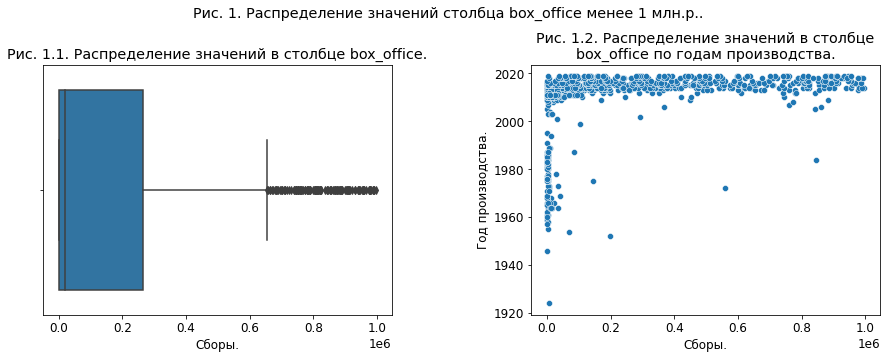

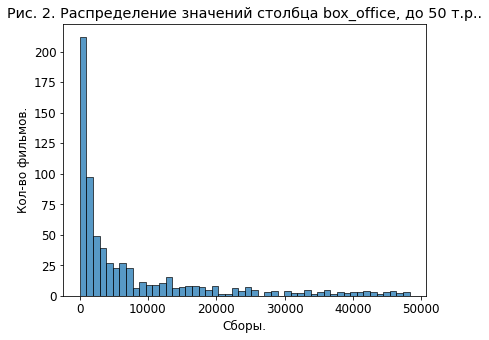

In [40]:
# Проверим распределение значений менее 1 млн.р. в столбце box_office 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(top=0.82, wspace=0.4)
fig.suptitle('Рис. 1. Распределение значений столбца box_office менее 1 млн.р..');
sns.boxplot(x='box_office', 
            data=data[~(data['box_office'].isna()) & 
                      (data['box_office'] < 1000000)], ax=axes[0])
axes[0].set_title('Рис. 1.1. Распределение значений в столбце box_office.')
axes[0].set_xlabel('Сборы.')
sns.scatterplot(x='box_office', y='production_year', 
            data=data.query('~(box_office.isna()) and ~(production_year.isna()) and \
                             box_office < 1000000'), 
            ax=axes[1])
axes[1].set_title('Рис. 1.2. Распределение значений в столбце' +
                  '\nbox_office по годам производства.')
axes[1].set_xlabel('Сборы.')
axes[1].set_ylabel('Год производства.')
plt.show();

# Проверим распределение значений менее 50 т.р.
plt.figure(figsize=(6.5, 5))
sns.histplot(x='box_office', 
             data=data.query('~(box_office.isna()) and box_office < 50000 and box_office > 0'), 
             bins=50
            )
plt.title('Рис. 2. Распределение значений столбца box_office, до 50 т.р..')
plt.xlabel('Сборы.')
plt.ylabel('Кол-во фильмов.')
plt.show();

- Примем за аномальные, выделяющиеся значения менее 1000р.
- Для оценки тенденций появления аномальных значений проверим, есть ли среди фильмов с аномальными сборами
  - фильмы с гос. поддержкой;
  - фильмы с категорией проката "Все права"
  (возможно, аномальные значения есть только для фильмов с категорией проката, включающей форматы помимо театрального показа).
- Посчитаем кол-во строк с аномальными значениями и выведем первые из них.
- Также, посчитаем кол-во строк с аномальными значениями для фильмов снятых не в СССР и выведем первые из них
  (возможно, такие значения распространены среди фильмов снятых в СССР, или, просто, среди фильмов, снятых в более ранний период).

In [41]:
# Проверим, есть ли среди фильмов с аномальными значениями в box_office, фильмы с гос. поддержкой
print("\nФильмов со значениями в столбце box_office менее 1000 и гос. поддержкой:",
      data.loc[(~data['box_office'].isna()) &
                     (data['box_office'] < 1000) &
                     (data['box_office'] > 0) &
                     (~(data['refundable_support'].isna()) |
                      ~(data['nonrefundable_support'].isna())), 'box_office'].shape[0]
     )

# Проверим, есть ли среди фильмов с аномальными значениями фильмы с категорией проката "все права"
print("\nФильмов со значениями в столбце box_office менее 1000 и категорией проката 'Все права':",
      data.loc[(~data['box_office'].isna()) &
                (data['box_office'] < 1000) &
                (data['cert_category'].str.contains('Все права')) &
                (data['box_office'] > 0), 'box_office'].shape[0],
     "\n")

print("~" * 50)

# Проверим сборы на аномальные значения
print("\033[1m", "\n\nФильмы со значениями в столбце box_office менее 1000", 
      "(", data.loc[(~data['box_office'].isna()) & 
                    (data['box_office'] < 1000) & 
                    (data['box_office'] > 0)].shape[0],
      ").", "\033[0m")
display(data.loc[(~data['box_office'].isna()) &
                       (data['box_office'] < 1000) &
                       (data['box_office'] > 0)].head()
       )

# Проверим сборы на аномальные значения для фильмов, снятых не в СССР
print("\033[1m", "\n\nФильмы со значениями в столбце box_office менее 1000, снятые не в СССР.",
      "(", data.loc[(~data['box_office'].isna()) & 
                    (data['box_office'] < 1000) & 
                    ~(data['production_country'].str.contains('СССР')) &
                    (data['box_office'] > 0)].shape[0], 
      ").", "\033[0m")
display(data.loc[(~data['box_office'].isna()) &
                       (data['box_office'] < 1000) &
                       ~(data['production_country'].str.contains('СССР')) &
                       (data['box_office'] > 0)].head(10)
       )


Фильмов со значениями в столбце box_office менее 1000 и гос. поддержкой: 1

Фильмов со значениями в столбце box_office менее 1000 и категорией проката 'Все права': 89 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 

Фильмы со значениями в столбце box_office менее 1000 ( 208 ). 


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
18,Неподдающиеся,111003616,2016-02-13 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,"мелодрама,комедия",360,1959,Все права,2016
19,Неподсуден,111003716,2016-02-13 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8,драма,420,1969,Все права,2016
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9,"комедия,мелодрама,криминал",380,1965,Все права,2013
61,Американская дочь,111005515,2015-04-23 00:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,комедия",300,1995,Все права,2015
75,Борис Годунов,111012213,2013-12-19 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", ""Баррандов"" (ЧССР) при...","СССР, ЧССР, Западный Берлин, ПНР",С.Бондарчук,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6,драма,420,1986,Все права,2013


 

Фильмы со значениями в столбце box_office менее 1000, снятые не в СССР. ( 180 ). 


,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year
61,Американская дочь,111005515,2015-04-23 00:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,комедия",300,1995,Все права,2015
336,Каникулы строгого режима,111008514,2014-08-08 00:00:00+00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7,"драма,комедия,приключения",360,2009,Все права,2014
351,Волшебное приключение,124000905,2015-01-19 00:00:00+00:00,Анимационный,"Экшион Филмз, Патэ Синема, Болексбразерс",Великобритания - Франция,Дэйв Бортвик,"Клауди Горский, Энди Лэйтон, Лаурен Родон, Пас...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6,"мультфильм,фэнтези,комедия",100,2005,"Театральный, DVD, Blu-Ray-Домашнее видео, Теле...",2015
436,Искатели могил,121004112,2012-02-16 00:00:00+00:00,Художественный,Диджитал Интерференс,США,Вишес Бразерс,"Сван Анджелски, Майкл Карлин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6,"ужасы,триллер",550,2011,"Театральный, Нетеатральный, Публичное видео, Д...",2012
464,КОКОКО,111003112,2012-06-05 00:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"драма,комедия",200,2012,Все права,2012
479,Голодные игры,121005712,2012-02-28 00:00:00+00:00,Художественный,"Колор Форс, Ладжер Зен Лайф Продакшн, Лайонсге...",США,Гэри Росс,"Нина Джейкобсон, Джон Килик",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",760,2012,Все права,2012
487,Отважная Лифи,124000512,2012-04-06 00:00:00+00:00,Анимационный,"Мьюнг Филмз, Одолтоджи",Южная Корея,Сон-Юн О,"Сун-ку Ким, Эун Ли",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7,"мультфильм,приключения,драма",200,2011,Все права,2012
506,Эмили Жоли,124000812,2012-04-26 00:00:00+00:00,Анимационный,"Теле Имаж Продюксьон, 2Дэ 3Дэ Анимасьон, Хонг ...",Франция,"Франсиз Нильсен, Филипп Шатель",Филипп Алессандри,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5,"мультфильм,семейный",240,2011,Все права,2012
514,Ржевский против Наполеона,111000212,2012-01-13 00:00:00+00:00,Художественный,"ООО ""Территория Кино""",Россия,М.Бальчунас,"ООО ""Квартал Леополис""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3,комедия,200,2012,Все права,2012
515,Ночь в супермаркете,124001212,2012-05-02 00:00:00+00:00,Анимационный,"Си 47 Продакшнз, Лайнс Гейт Фэмили Интертейнме...",США,Лоуренс Казанофф,"Джордж Джонсен, Лоуренс Казанофф, Элисон Сэвич...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,2,"мультфильм,комедия,семейный",620,2009,Театральный,2012


##### Выводы:
Оставим аномальные значения без изменений, т.к.
- данные других столбцов участвуют в исследовании;
- ни один фильм не представляет интереса с точки зрения оценки спроса зрителя на фильмы с государственной поддержкой;
- пропуски не повлияют значительно на статистические показатели.

#### Общие выводы:
- `budget`<br> 
_При анализе не будем учитывать пропуски в столбце `budget`, которые не удалось заполнить._
  - _Аномальные значения:_<br>Аномальными значениями бюджета будут значения меньше суммы возвратных и невозвратных средств гос. поддержки.
  - _Обработка:_<br>
    - нулевые значения в строках с известным объемом гос. поддержки заполнены известными из баз "Фонда Кино" и "Кинопоиска";
    - оставшиеся нулевые значения рассчитаны как суммы двух видов господдержки.
- `box_office`<br> 
_При анализе не будем учитывать значения столбца `box_office` менее 1000 р. и пропуски, которые не удалось заполнить._
  - _Аномальные значения:_ <br>В данных присутсвует 207 фильмов со значениями кассовых сборов в столбце `box_office` менее 1000р., выпущенных в разные годы для показа в кинотеатрах, домашнего просмотра и смешанных категорий проката. Чёткой тенденции не просматривается. <br>Анализ кассовых сборов представленных фильмов показал, что больша́я часть таких значений приведена в млн.р. для сборов одновременно и в кинотеатрах, и в домашнем прокате, и прокате на телевидении. <br> Но, т.к. малая часть значений  приведена только для сборов в кинотеатрах (e.g.:"Ночь в супермаркете"; фильмы, произведенные в СССР), с уверенностью заменить значения на млн.р. нельзя. Также не подойдут другие способы замены, т.к. точных данных о прокате не в кинотеатрах нет и значения сборов сильно разнятся от фильма к фильму.<br>
  - _Обработка:_ <br>Оставим аномальные значения без изменений, т.к. 
    - данные других столбцов участвуют в исследовании;
    - ни один фильм не представляет интереса с точки зрения оценки спроса зрителя на фильмы с государственной поддержкой;
    - пропуски не повлияют значительно на статистические показатели.

### Добавление новых столбцов.





#### Создание столбца с информацией о годе проката. Выделение года из даты премьеры фильма.<br>

_Столбец создан в разделе [Изучение пропусков в датафрейме.](#Изучение-пропусков-в-датафрейме.)_

#### Создание столбцов с именем режиссёра и жанром фильма.
Создание двух столбцов: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [42]:
# Создадим столбцы
data['director_main'] = data['director'].str.split(pat=',').str[0]
data['genre_main'] = data['genre'].str.split(pat=',').str[0]


# ### Альтернативная функция:
# def get_first_elem(elem):
#     try:
#         if ',' in elem:
#             return elem.split(',')[0]
#         else:
#             return elem
#     except:
#         return 'NaN'

# data['director_main'] = data['director'].apply(get_first_elem)
# data['genre_main'] = data['genre'].apply(get_first_elem)

#### Добавление столбца с долей государственной поддержки от общего бюджета фильма.

In [43]:
# Создадим столбец
data['support_ratio'] = (data['refundable_support'] + 
                         data['nonrefundable_support']) / \
                         data['budget']

#### Создание столбца с возрастными ограничениями в целочисленном формате.

In [44]:
# (Начнём изучать регулярные выражения) 
# Добавим столбец и проверим рез-тат
data['age'] = data['age_restriction'].str.extract('(\d+(?=\+))').astype(int)
data['age'].unique()

array([18,  6, 12, 16,  0])

#### Проверка результата.

In [45]:
# Проверим рез-тат
display(data.head())
data.info()

,title,cert_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genre,box_office,production_year,cert_category,show_start_year,director_main,genre_main,support_ratio,age
0,Открытый простор,221048915,2015-11-27 00:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"боевик,драма,мелодрама",NaN,2003,Телевидение,2015,Кевин Костнер,боевик,NaN,18
1,Особо важное задание,111013716,2016-09-14 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7,"драма,военный",NaN,1980,Показ фильма в кинозале и прокат фильма на мат...,2016,Е.Матвеев,драма,NaN,6
2,Особо опасен,221038416,2016-10-10 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2008,прокат фильма на материальном носителе,2016,Тимур Бекмамбетов,фантастика,NaN,18
3,Особо опасен,221026916,2016-06-10 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2008,прокат фильма на материальном носителе,2016,Тимур Бекмамбетов,фантастика,NaN,18
4,Особо опасен,221030815,2015-07-30 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7,"фантастика,боевик,триллер",NaN,2008,Телевидение (неисключительные права),2015,Тимур Бекмамбетов,фантастика,NaN,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7484
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7457 non-null   object             
 1   cert_number            7457 non-null   int64              
 2   show_start_date        7457 non-null   datetime64[ns, UTC]
 3   type                   7457 non-null   object             
 4   film_studio            7439 non-null   object             
 5   production_country     7457 non-null   object             
 6   director               7448 non-null   object             
 7   producer               6889 non-null   object             
 8   age_restriction        7457 non-null   object             
 9   refundable_support     331 non-null    float64            
 10  nonrefundable_support  331 non-null    float64            
 11  budget                 331 non-null    float64          

#### Выводы:
Были созданы следующие столбцы:
- `director_main`, с именем и фамилией главного режиссёра;
- `genre_main`, с основным жанром фильма;
- `support_ratio`, с долей гос. поддержки от общего бюджета;
- `age`, с возрастным ограничением в целочисленном формате.

## Исследовательский анализ данных.
_(В рамках данного исследования не учитываем в расчетах изменения финансовых параметров фильмов за счет изменеиня курса рубля и других экономических показателей, в частности, для фильмов, произведенных не в РФ, составляющих немалую часть сборов.)_<br>

- Проверим распределение кассовых сборов по странам производства фильмов.
- Посмотрим сколько фильмов российского производства выходило по годам.
- Проверим какие фильмы выходили в течение рассматриваемого периода.

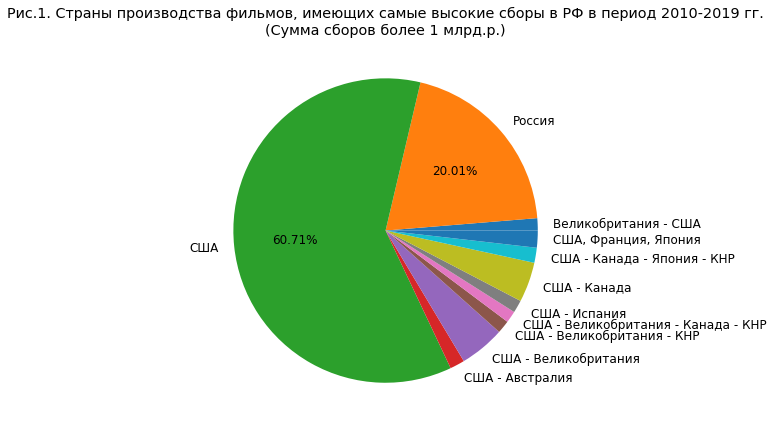

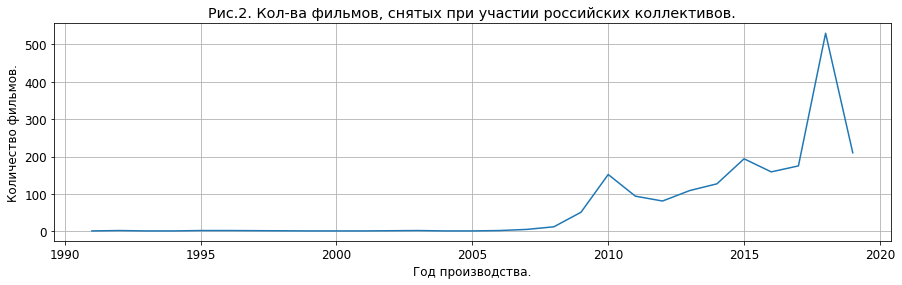

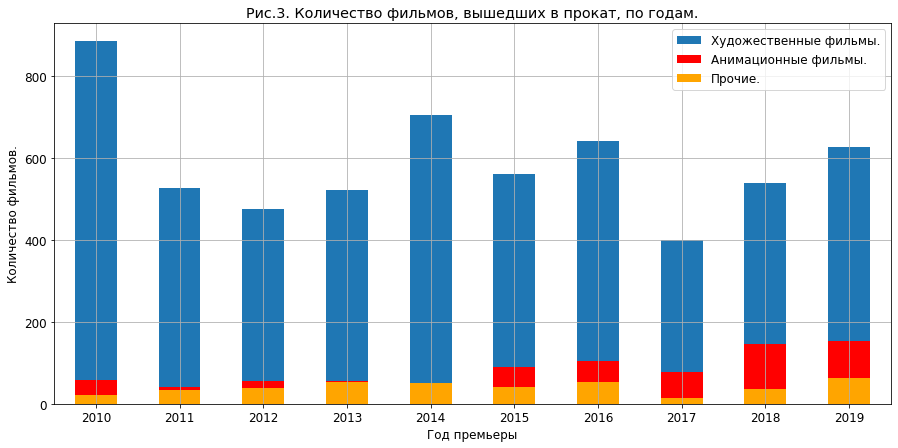

In [46]:
# Функция удаления аннотаций со значениями менее 10 на долевом графике
def my_autopct(pct):
    if pct > 10:
        return ('%.2f%%' % pct)
    else:
        return ''

prod_country_title = ('Рис.1. Страны производства фильмов, имеющих самые'\
                      ' высокие сборы в РФ в период 2010-2019 гг.\n'\
                      '(Cумма сборов более 1 млрд.р.)')
# График сумм сборов по странам производства по всему периоду
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
prod_country = data[data['box_office'] > 1000000000].groupby('production_country')['box_office'].sum()
ax.pie(prod_country,  labels=prod_country.index, autopct=my_autopct)
plt.title(prod_country_title)
plt.show();

# График кол-ва фильмов снятых при участии РФ
(data[data['production_country'].str.contains('Россия')]
 .groupby('production_year')['title']
 .count()
 .plot(figsize=(15, 4), grid=True))
plt.title('Рис.2. Кол-ва фильмов, снятых при участии российских коллективов.')
plt.xlabel('Год производства.')
plt.ylabel('Количество фильмов.')
plt.show();

# График кол-ва фильмов вышедших в прокат по годам выхода
(data[data['type'].str.contains('Худ')]
 .groupby('show_start_year')['type']
 .count()
 .plot(kind='bar', figsize=(15, 7)))
(data[data['type'].str.contains('Аним')]
 .groupby('show_start_year')['type']
 .count()
 .plot(kind='bar', color='red'))
(data[data['type'].str.contains('Проч')]
 .groupby('show_start_year')['type']
 .count()
 .plot(kind='bar', color='orange', grid=True))
plt.title('Рис.3. Количество фильмов, вышедших в прокат, по годам.')
plt.legend(['Художественные фильмы.', 'Анимационные фильмы.', 'Прочие.'])
plt.xticks(rotation=0)
plt.xlabel('Год премьеры')
plt.ylabel('Количество фильмов.')
plt.show();

**Выводы:** 
- Около 80% российского проката приходится на фильмы иностранного производства (рис.1), но кол-во фильмов, снятых российскими коллективами или при их участии, растёт, как видно из рис.2. 
>Падение производства кино в 2018 - 2019 гг. соответствует мировой тенденции, возможно, <a href="https://www.hollywoodreporter.com/business/business-news/fueled-by-streaming-global-entertainment-market-hit-record-100-billion-2019-1283800/" target=_blank>связано с распространением "стриминговых" и др. платформ для просмотра кино</a>, и, в любом случае, не подлежит оценке без дополненных современных данных). 
- В подавляющем большинстве на российские киноэкраны выходят художественные фильмы.<br>

### Период, представленный полнее всего.
- Проверим, сколько фильмов выходило в прокат каждый год, обратив внимание на то, что данные о прокате в кинотеатрах известны не для всех фильмов. 

- Выведем графики 
  - распределения кассовых сборов по годам;
  - изменения кол-ва фильмов по годам за период.
- Вычислим долю фильмов с указанной информацией о прокате в кинотеатрах.

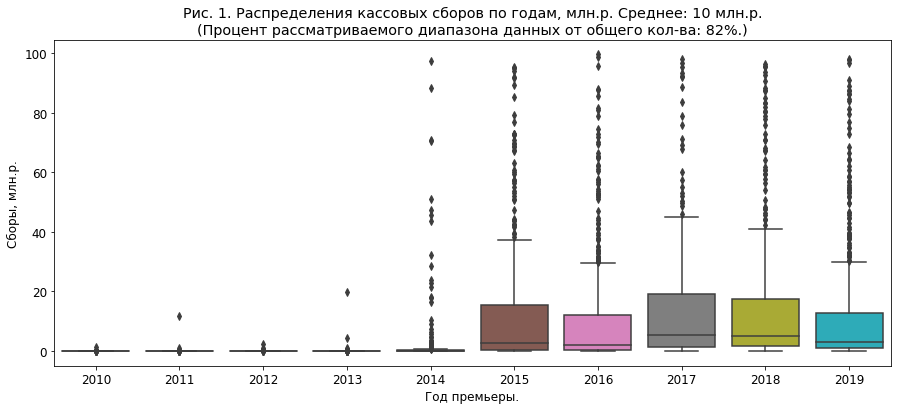

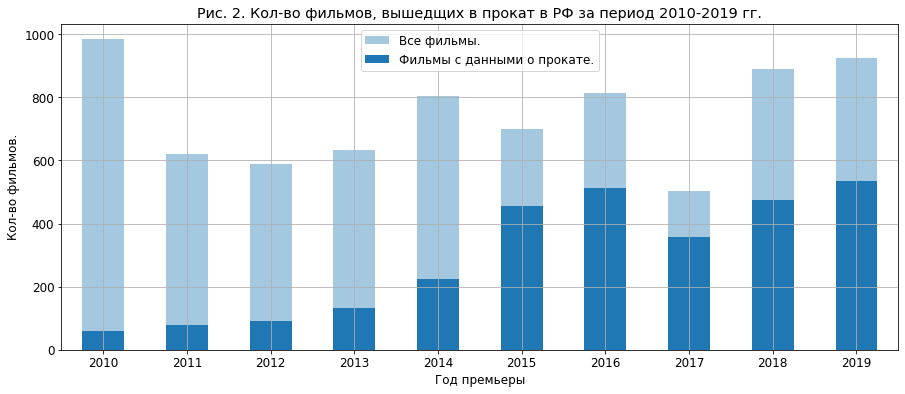

Доля фильмов с указанной информацией о прокате в кинотеатрах: 39%.
Среднее кол-во фильмов за весь период:  745


In [47]:
# Выведем распределения кассовых сборов по годам
film_sales = data.query('box_office < 100000000').copy()
film_sales['box_office'] = film_sales['box_office'] / 1000000

fig, ax = plt.subplots(figsize=(15, 6))
graph = sns.boxplot(data=film_sales, x='show_start_year', y='box_office')
plt.title("Рис. 1. Распределения кассовых сборов по годам, млн.р. Среднее: " + 
          str(int(round(film_sales['box_office'].mean(), 0))) + " млн.р." +
          "\n(Процент рассматриваемого диапазона данных от общего кол-ва: " + 
          ("{:.0%}".format(data
                           .query('show_start_year > 2014' + 
                                  'and box_office < 100000000')['box_office']
                           .count() /
                           data
                           .query('show_start_year > 2014' + 
                                  'and box_office.notna()')['box_office']
                           .count()
                          ) + ".)"))
plt.xlabel('Год премьеры.')
plt.ylabel('Сборы, млн.р.')
plt.show();

# Создадим срез датасета с фильмами по которым есть данные о прокате
# для последующего использования
bo_present = data[~(data['box_office'].isna()) & (data['box_office'] > 1000)]

# Выведем график изменения кол-ва фильмов по годам
data.groupby('show_start_year')['title'].count().plot(kind='bar', figsize=(15, 6), alpha=0.4)
plt.title('Рис. 2. Кол-во фильмов, вышедщих в прокат в РФ за период 2010-2019 гг.')
bo_present.groupby('show_start_year')['title'].count().plot(kind='bar', grid=True)
plt.xticks(rotation=0)
plt.legend(['Все фильмы.', 'Фильмы с данными о прокате.'])
plt.xlabel('Год премьеры')
plt.ylabel('Кол-во фильмов.')
plt.show();

print("Доля фильмов с указанной информацией о прокате в кинотеатрах:",
      "{:.0%}.".format(bo_present.shape[0] / data.shape[0]))
print("Среднее кол-во фильмов за весь период: ",
      int(data.groupby('show_start_year')['title'].count().mean()))

#### Выводы:
- Как видно на рисунке 2., распределения начинают приближенно дублировать друг-друга начиная с 2015 г. Это же подтверждает рис. 1, на котором видно, что до 2015 г., информации по кассовым сборам практически нет. Следовательно, полнее всего в данных с известной информацией о прокате представлены фильмы, вышедшие в период 2015-2019 гг.
- В среднем в год в России в рассматриваемый период выходило в прокат по 748 фильмов. 
> Удивительно, но цифры не врут: кол-во фильмов вышедших в прокат в РФ сопоставимо с суммарным кол-вом фильмов вышедших в прокат в США и Канаде (<a href="https://www.statista.com/statistics/187122/movie-releases-in-north-america-since-2001/" target=_blank>по данным аналитического агентств statista</a>).

### Изучение динамики проката.
- Изучим изменение динамики проката по годам и мин., макс. суммы сборов.

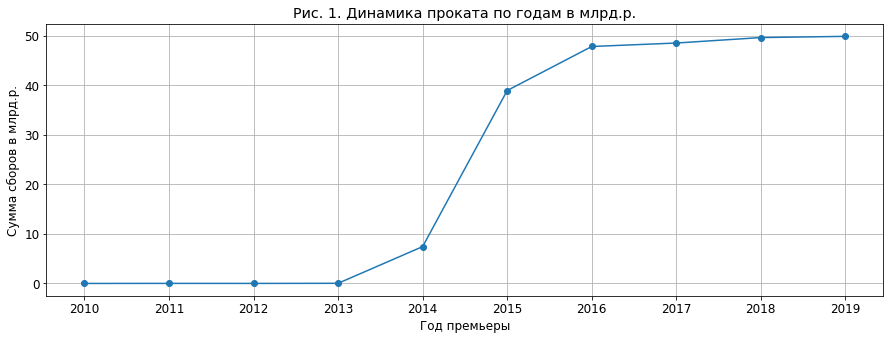

- Сумма сборов была минимальной в 2010 году. 
- Сумма сборов была максимальной в 2019 году.


In [48]:
# Создадим сводную таблицу со статистиками сборов и переведём сумму в млрд.р.
bo_stats = bo_present.pivot_table(index='show_start_year', 
                                  values='box_office', 
                                  aggfunc=('sum', 'mean', 'median'))
bo_stats = bo_stats / 1000000000

# Выведем график изменения суммы сборов в млрд.р. по годам
bo_stats['sum'].plot(style='o-', figsize=(15, 5), grid=True)
plt.title('Рис. 1. Динамика проката по годам в млрд.р.')
plt.xlabel('Год премьеры')
plt.ylabel('Сумма сборов в млрд.р.')
plt.xticks(bo_stats.index)
plt.show();

# Выведем годы с мин. и макс. значениями суммы сборов
print(f"- Сумма сборов была минимальной в {bo_stats['sum'].idxmin()} году.",
     f"\n- Сумма сборов была максимальной в {bo_stats['sum'].idxmax()} году.")

#### Выводы:
- По общему временному периоду можно только еще раз сказать, что данных до 2015 г. недостаточно для оценки. 
- В период 2015 - 2019 гг., суммы кассовых сборов показывают рост (рис. 1), что иллюстрирует как рост рынка в целом, так и рост производства фильмов с участием российских коллективов;

### Вычисление средней и медианной суммы сборов.
- С помощью сводной таблицы вычислим среднюю и медианную сумму сборов для каждого года и построим график.

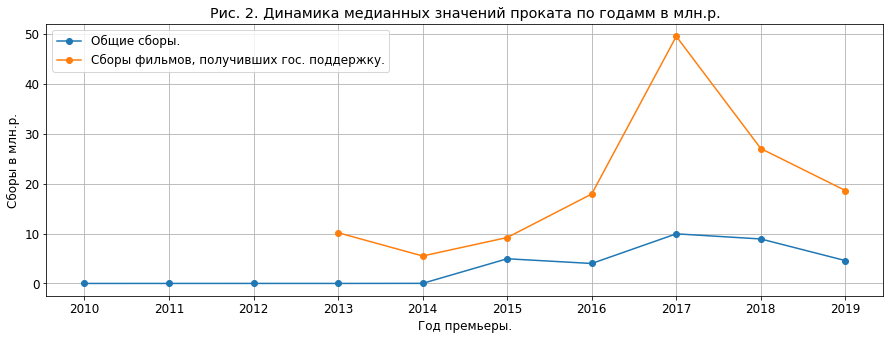

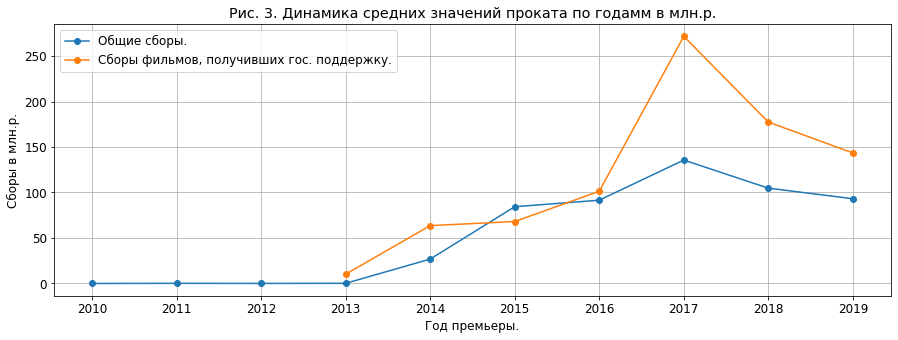

In [49]:
# Переведём записи с указанной гос. поддержкой в новый датафрейм для анализа
support_present = bo_present[bo_present['financing_source'].notna()].copy().reset_index()

# Добавим в датафрейм столбец с прибылью
support_present['profit'] = support_present['box_office'] - support_present['budget']

# Добавим столбец с категорией прибыльности
for i in range(support_present.shape[0]):
    if support_present.loc[i, 'profit'] >= 0:
        support_present.loc[i, 'profitability'] = 'Окупившийся'
    else:
        support_present.loc[i, 'profitability'] = 'Убыточный'

# Добавим столбец с суммами общей гос. поддержки
support_present['total_support'] = support_present['refundable_support'] + \
                                   support_present['nonrefundable_support']


# Выведем графики изменения медианного значения сборов в млрд.р. по годам
(
    (data
     .groupby('show_start_year')['box_office']
     .median() / 1000000)
    .plot(figsize=(15, 5), style='o-')
)
(
    (support_present
     .groupby('show_start_year')['box_office']
     .median() / 1000000)
    .plot(figsize=(15, 5), style='o-', grid=True)
)
plt.title('Рис. 2. Динамика медианных значений проката по годамм в млн.р.')
plt.legend(['Общие сборы.', 'Сборы фильмов, получивших гос. поддержку.'])
plt.xlabel('Год премьеры.')
plt.ylabel('Сборы в млн.р.')
plt.xticks(bo_stats.index)
plt.show();

# Выведем графики изменения среднего значения сборов в млрд.р. по годам
(
    (data
     .groupby('show_start_year')['box_office']
     .mean() / 1000000)
    .plot(figsize=(15, 5), style='o-')
)
(
    (support_present
     .groupby('show_start_year')['box_office']
     .mean() / 1000000)
    .plot(figsize=(15, 5), style='o-', grid=True)
)
plt.title('Рис. 3. Динамика средних значений проката по годамм в млн.р.')
plt.legend(['Общие сборы.', 'Сборы фильмов, получивших гос. поддержку.'])
plt.xlabel('Год премьеры.')
plt.ylabel('Сборы в млн.р.')
plt.xticks(bo_stats.index)
plt.show();

#### Выводы:
- По общему временному периоду можно только еще раз сказать, что данных до 2015 г. недостаточно для оценки. 
- Во временном периоде, данные в котором представленны полнее всего,
  - динамика средних и медианных значений кассовых сборов (рис. 2-3) позволяет сказать, что государственная поддержка, в целом, успешнее рынка, а в 2017 г., успешнее в несоклько раз, что означает, что интерес к фильмам с гос. поддержкой есть;
  - увеличение средних и медианных значений и небольшой спад сумм сборов около 2017 г., означает уменьшение кол-ва фильмов, вышедших в прокат, при увеличении кассовых сборов;
  - падение средних и медианных значений сумм сборов в 2018 - 2019 гг. соответсвует мировой тенденции и не подлежит оценке без дополненных современных данных;
  - средние значения сильно превышают медианные, что означет наличие сравнительно небольшого кол-ва "блокбастеров", собирающих большие кассы и основную массу фильмов, сборы которых не превышают 10 млн.р.

### Влияние возрастных ограничений.
Определим, 
- влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год;
- фильмы с каким возрастным ограничением собрали больше всего денег в прокате;
- меняется ли картина в зависимости от года.

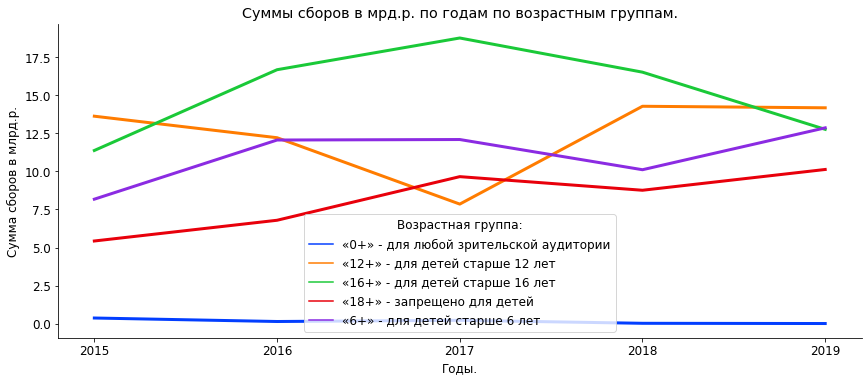

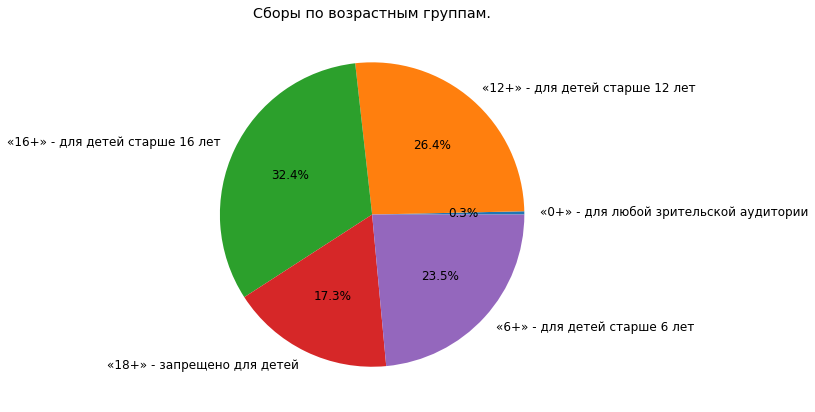

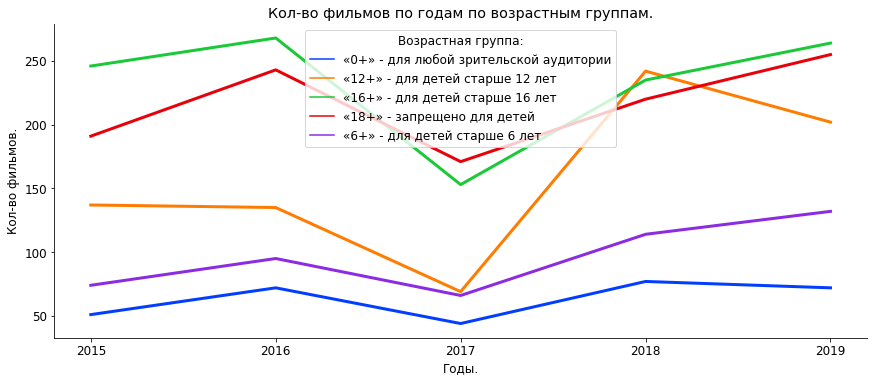

In [50]:
# Создадим сводную таблицу с данными по возрастным ограничениям, 
# датой и суммой сборов, переведя сумму сборов в млрд.р.
age_stats = (
    bo_present[bo_present['show_start_year'] > 2014]
    .pivot_table(index=['age_restriction','show_start_year'], 
                 values='box_office', 
                 aggfunc='sum'))
age_stats['box_office'] = age_stats['box_office'] / 1000000000
age_stats = age_stats.reset_index()

# Построим графики сумм сборов по годам и распределения сумм сборов по возр. группам
g = sns.relplot(x='show_start_year',  y='box_office', data=age_stats, kind='line',  
                  hue='age_restriction', linewidth = 3, height=5, aspect=1.6, palette='bright')
g.legend.remove()
g.fig.set_figwidth(20)
plt.legend().set_title('Возрастная группа:')
plt.title('Суммы сборов в мрд.р. по годам по возрастным группам.')
plt.xlabel('Годы.')
plt.xticks(age_stats['show_start_year'].unique())
plt.ylabel('Сумма сборов в млрд.р.')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.1f}'))
plt.show();

# График распределения сборов по возр. группам
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
bo_per_age = age_stats.groupby('age_restriction')['box_office'].sum()
ax.pie(bo_per_age,  labels=bo_per_age.index, autopct='%1.1f%%')
plt.title('Сборы по возрастным группам.')
plt.show();

# Создадим сводную таблицу с данными по возрастным ограничениям, 
# датой и кол-вом фильмов
age_titles_count = (
    data[data['show_start_year'] > 2014]
    .groupby(['show_start_year','age_restriction'])['title']
    .count()
    .reset_index())

# Построим график кол-в фильмов по годам и возр. группам
g = sns.relplot(x='show_start_year', y='title', data=age_titles_count, kind='line',  
                  hue='age_restriction', linewidth = 3, height=5, aspect=1.6, palette='bright')
g.legend.remove()
g.fig.set_figwidth(20)
plt.legend().set_title('Возрастная группа:')
plt.title('Кол-во фильмов по годам по возрастным группам.')
plt.xlabel('Годы.')
plt.xticks(age_stats['show_start_year'].unique())
plt.ylabel('Кол-во фильмов.')
plt.show()

#### Выводы: 
Графики распределений сумм сборов и количеств фильмов по возрастным группам по годам показывают:<br>
- Наибольшей популярностью пользуются фильмы для подростков и взрослых с категорией `16+`, собирающие самые большие кассы и выпускающиеся в самом большом кол-ве.
- Категории фильмов `6+` и `18+` показывают рост сумм кассовых сборов, что,  связано с увеличением кол-ва фильмов для детей и взрослых соответственно и, в частности, увеличение кол-ва фильмов, произведенных в РФ.<br>
- Категория `0+` оказалась самой неприбыльной и малочисленной, скорее всего, потому, что основная часть фильмов разделена по остальным категориям и детей до 6 лет редко приводят в кинотеатры.
- Категории `18+`, `16+` и `6+` показывают одновременно спад кол-ва выпущенных в прокат фильмов и рост сумм сборов в области 2017 г., которые формируют соответствующие спад и рост в общем распределении фильмов и означают уменьшение кол-ва фильмов, вышедших в прокат, при увеличении кассовых сборов.

## Исследование фильмов, получивших государственную поддержку.

На этом этапе нет конкретных инструкций и заданий — изучим интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.
> За окупаемость фильма примем положительную разницу между кассовыми сборами и бюджетом без учёта расходов на рекламу и пр.

In [52]:
# Посчитаем кол-во стран окроме РФ, которым оказывалась поддержка
print("Кол-во стран-производителей фильмов, кроме России, которым оказывалась гос.поддержка: ",
      len(support_present.loc[~(support_present['production_country'].str.contains('Россия')),
                              'production_country'].unique()))

# Выведем корреляционную матрицу для анализа зависимостей
columns_to_matrix = ['refundable_support', 'nonrefundable_support',
                     'total_support', 'budget', 'rating', 'box_office',
                     'production_year', 'show_start_year', 'age', 
                     'support_ratio', 'profit']

(
    support_present[columns_to_matrix]
    .corr()
    .style
    .background_gradient(cmap='coolwarm')
    .set_precision(2)
    .set_caption('Корреляционная матрица.')
    .set_table_styles(styles)
)

Кол-во стран-производителей фильмов, кроме России, которым оказывалась гос.поддержка:  0


,refundable_support,nonrefundable_support,total_support,budget,rating,box_office,production_year,show_start_year,age,support_ratio,profit
refundable_support,1.00,0.36,0.64,0.66,0.01,0.34,0.11,0.09,-0.24,-0.02,-0.05
nonrefundable_support,0.36,1.00,0.95,0.62,0.15,0.47,0.13,0.12,-0.15,0.10,0.12
total_support,0.64,0.95,1.00,0.74,0.13,0.51,0.14,0.13,-0.21,0.08,0.08
budget,0.66,0.62,0.74,1.00,0.09,0.39,0.16,0.14,-0.22,-0.31,-0.20
rating,0.01,0.15,0.13,0.09,1.00,0.15,0.05,0.04,0.04,-0.02,0.10
box_office,0.34,0.47,0.51,0.39,0.15,1.00,0.15,0.12,-0.18,-0.11,0.82
production_year,0.11,0.13,0.14,0.16,0.05,0.15,1.00,0.97,-0.03,-0.05,0.06
show_start_year,0.09,0.12,0.13,0.14,0.04,0.12,0.97,1.00,0.01,-0.05,0.04
age,-0.24,-0.15,-0.21,-0.22,0.04,-0.18,-0.03,0.01,1.00,0.10,-0.05
support_ratio,-0.02,0.10,0.08,-0.31,-0.02,-0.11,-0.05,-0.05,0.10,1.00,0.08


**Предварительные выводы:**<br>

Корреляционная матрица демонстрирует следующие интересные зависимости:
- зависимость кассовых сборов от объёма поддержки;
- Зависимость кассовых ;
- зависимость возвратной поддержки от возрастной категории.<br>

Выведем графики и рассмотрим эти и другие закономерности подробнее.

### Анализ прибыльности фильмов с гос. поддержкой.

,Год выхода в прокат.,Процент прибыльности.
0,2015,19%
1,2016,20%
2,2017,38%
3,2018,36%
4,2019,19%


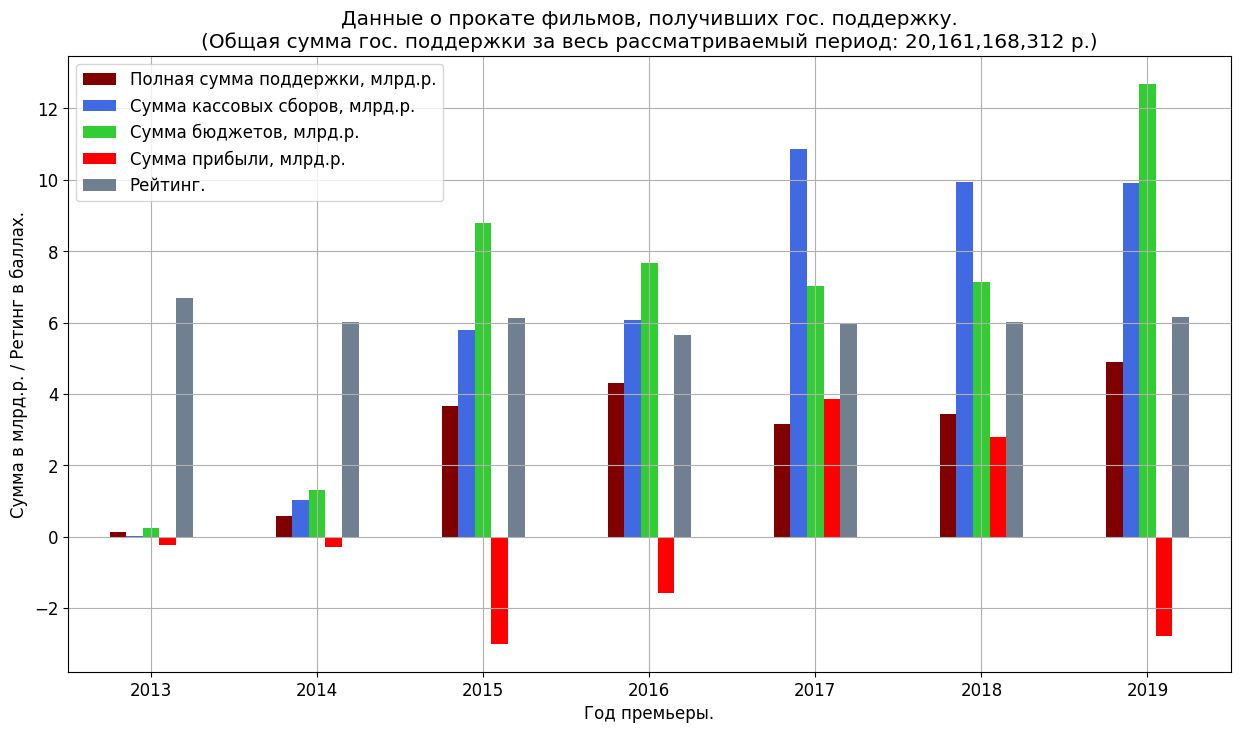

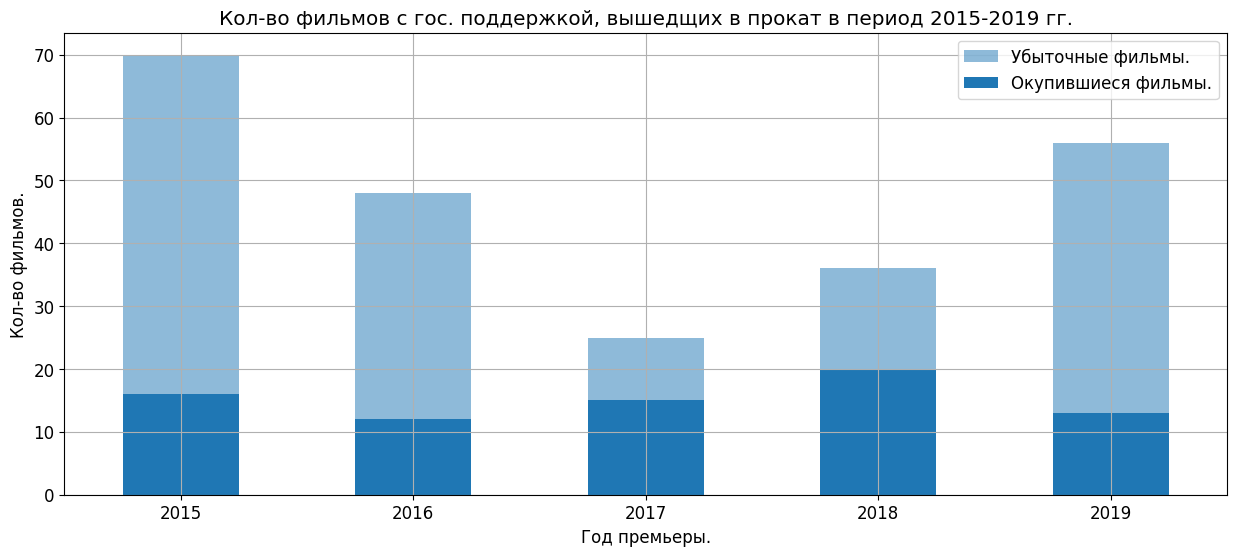

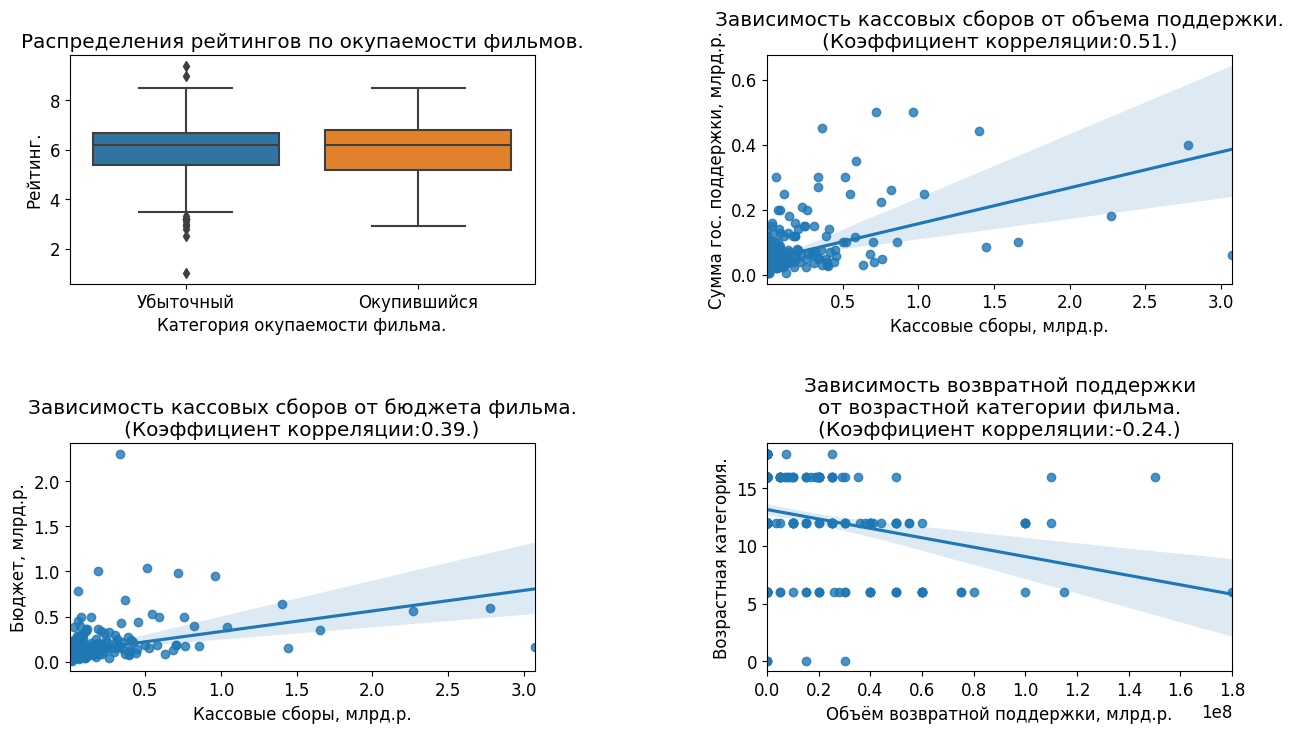

In [52]:
# Процент прибыльности по годам
years = [2015, 2016, 2017, 2018, 2019]
profitable_percent = []
for year in years:
    profitable_percent.append(
        [year, "{:.0%}".format(int(support_present[(support_present['show_start_year'] == year) & \
                                                   (support_present['profit'] > 0)] \
                                   .groupby('show_start_year')['title'].count()) / \
                               len(support_present[support_present['show_start_year'] == year]))])
    
display(pd.DataFrame(data=profitable_percent, \
                     columns=['Год выхода в прокат.', 'Процент прибыльности.']
                    ).style.set_caption('Процент прибыльных фильмов.').set_table_styles(styles))


# Отобразим на графике данные о прокате, общие суммы поддержки  и рейтинг по годам
graph_title = ("Данные о прокате фильмов, получивших гос. поддержку."\
               "\n(Общая сумма гос. поддержки за весь рассматриваемый период: "\
               "{:,.0f}".format(support_present['total_support'].sum()) + " р.)")

prod_country_title = ('Рис.1 Страны производства фильмов, имеющих самые'\
                      ' высокие сборы в РФ в период 2010-2019 гг.\n'\
                      '(сумма сборов более 1 млрд.р.)')

((support_present.groupby('show_start_year') \
  .agg({'total_support' : (lambda x: x.sum() / 1000000000),
        'box_office' : (lambda x: x.sum() / 1000000000),
        'budget' : (lambda x: x.sum() / 1000000000),
        'profit' : (lambda x: x.sum() / 1000000000),
        'rating' : 'mean'})) \
 .plot(kind='bar', grid=True, figsize=(15, 8), 
       color=['maroon', 'royalblue', 'limegreen', 'red', 'slategrey'])
)
plt.title(graph_title)
plt.xticks(rotation=0)
plt.legend(['Полная сумма поддержки, млрд.р.', 
            'Сумма кассовых сборов, млрд.р.', 
            'Сумма бюджетов, млрд.р.', 
            'Сумма прибыли, млрд.р.', 
            'Рейтинг.'])
plt.xlabel('Год премьеры.')
plt.ylabel('Сумма в млрд.р. / Ретинг в баллах.')
plt.show();

# Построим график соотношения прибыльности фильма с суммой гос. поддержки
support_present[(support_present['show_start_year'] > 2014) & 
                (support_present['profit'] < 0)] \
                .groupby('show_start_year')['title'] \
                .count() \
                .plot(kind='bar', grid=True, alpha=0.5)
support_present[(support_present['show_start_year'] > 2014) & 
                (support_present['profit'] >= 0)] \
                .groupby('show_start_year')['title'] \
                .count() \
                .plot(kind='bar', figsize=(15, 6), grid=True)
plt.title('Кол-во фильмов с гос. поддержкой, вышедщих в прокат в период 2015-2019 гг.')
plt.xticks(rotation=0)
plt.legend(['Убыточные фильмы.', 'Окупившиеся фильмы.'])
plt.xlabel('Год премьеры.')
plt.ylabel('Кол-во фильмов.')
plt.show();

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.7)
# Построим график распределения рейтинга по окупаемости
sns.boxplot(data=support_present, x='profitability', y='rating', ax = axes[0, 0])
axes[0, 0].set_title('Распределения рейтингов по окупаемости фильмов.')
axes[0, 0].set_xlabel('Категория окупаемости фильма.')
axes[0, 0].set_ylabel('Рейтинг.')

# Построим график зависимости кассовых сборов от объема гос. поддержки
sns.regplot(data=(support_present[['box_office', 'total_support']] / 1000000000), 
            x='box_office', y='total_support', ax = axes[0, 1])
axes[0, 1].set_title("Зависимость кассовых сборов от объема поддержки." +
                     "\n(Коэффициент корреляции:" + 
                     f"{round(support_present['box_office'].corr(support_present['total_support']), 2)}.)")
axes[0, 1].set_xlabel('Кассовые сборы, млрд.р.')
axes[0, 1].set_ylabel('Сумма гос. поддержки, млрд.р.')

# Построим график зависимости кассовых сборов от бюджета
sns.regplot(data=(support_present[['box_office', 'budget']] / 1000000000), 
            x='box_office', y='budget', ax = axes[1, 0])
axes[1, 0].set_title("Зависимость кассовых сборов от бюджета фильма." + 
                     "\n(Коэффициент корреляции:" +
                     f"{round(support_present['box_office'].corr(support_present['budget']), 2)}.)")
axes[1, 0].set_xlabel('Кассовые сборы, млрд.р.')
axes[1, 0].set_ylabel('Бюджет, млрд.р.')

# Построим график зависимости возвратной поддержки от возрастного ограничения
sns.regplot(data=(support_present[['refundable_support', 'age']]), 
            x='refundable_support', y='age', ax = axes[1, 1])
axes[1, 1].set_title("Зависимость возвратной поддержки" +
                     "\nот возрастной категории фильма." + 
                     "\n(Коэффициент корреляции:" + 
                     f"{round(support_present['refundable_support'].corr(support_present['age']), 2)}.)")
axes[1, 1].set_xlabel('Объём возвратной поддержки, млрд.р.')
axes[1, 1].set_ylabel('Возрастная категория.')
plt.show();

#### Выводы:
- Графики демонстрируют, что в период 2015 - 2019 гг., в котором данные о кассовых сборах представлены лучше всего, окупившихся фильмов с государственной поддержкой больше чем убыточных только в двух из пяти случаев. В среднем процент прибильности в этом периоде - 26%, низкий показатель, с учётом серьезной суммы, выделенной на поддержку кино (более 20 млрд.р.).
- Также, судя по графику, кол-ва фильмов с гос. поддержкой, прибыльные годы приходятся на спад кол-ва спонсируемых фильмов, что, скорее всего, говорит о большей эффективности поддержки при точечном подходе, - спонсировании небольшого кол-ва фильмов, с хорошей перспективой продаж.
- Медианный рейтинг фильмов с гос. поддержкой - 6 баллов, что означает, что поддержка оказывается фильмам среднего качества. Это подтверждает неизменное распределение рейтингов фильмов относительно окупаемости.
- Зависимость кассовых сборов от объёма поддержки, скорее всего, объясняется эффектиностью дополнительной рекламы Министерством Культуры спонсируемых фильмов (e.g.: новости на федеральных каналах) и общий повышенный интерес к фильмам с гос. поддержкой.
- Зависимость кассовых сборов от бюджета фильма небольшая, но присутсвует, и логична: фильмы с большим бюджетов более привлекательны для массового зрителя.
- Обратная зависимость возвратной поддержки от возрастной категории означает, что в качестве основного фокуса поддержки Министерство Культуры и "Фонд Кино" выбирают массовые категории 16+ и 12+.

### Анализ жанров и рейтингов фильмов.

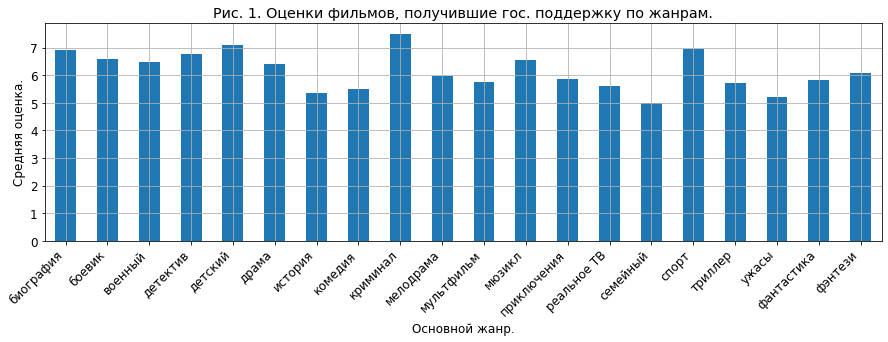

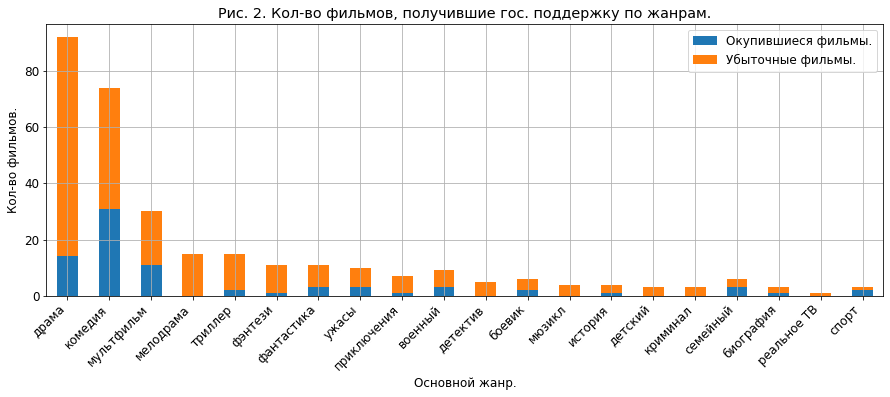

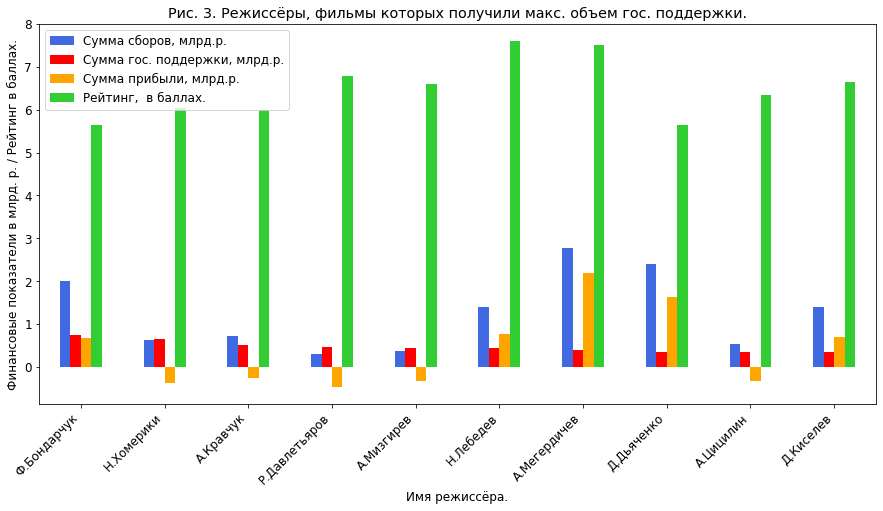

In [54]:
# Выведем график оценок по жанру
(
    support_present
    .groupby('genre_main')['rating']
    .mean()
    .plot(kind='bar', figsize=(15, 4), grid=True)
)
plt.xticks(rotation=45,  ha='right')
plt.title('Рис. 1. Оценки фильмов, получившие гос. поддержку по жанрам.')
plt.xlabel('Основной жанр.')
plt.ylabel('Средняя оценка.')
plt.show();



# Выведем график окупаемости по жанру
support_present['profit_count'] = (
    support_present
    .query('profitability == "Окупившийся"')['profit']
)
support_present['loss_count'] = (
    support_present
    .query('profitability == "Убыточный"')['profit']
)
(
    support_present
    .groupby('genre_main')[['profit_count', 'loss_count']]
    .count()
    .sort_values(by='loss_count', ascending=False)
    .plot(kind='bar', stacked=True, y=['profit_count', 'loss_count'], 
          grid=True, figsize=(15, 5))
)
plt.legend(['Окупившиеся фильмы.', 'Убыточные фильмы.'])
plt.title('Рис. 2. Кол-во фильмов, получившие гос. поддержку по жанрам.')
plt.xlabel('Основной жанр.')
plt.xticks(rotation=45,  ha='right')
plt.ylabel('Кол-во фильмов.')
plt.show();

# Выведем граофик прибыльности фильмов режиссеров, получивших наибольший 
# объём гос. поддежкм
support_present.groupby('director_main') \
.agg({'box_office' : (lambda x: x.sum() / 1000000000),
      'total_support' : (lambda x: x.sum() / 1000000000),
      'profit' : (lambda x: x.sum() / 1000000000),
      'rating' : 'mean'}) \
.sort_values(by='total_support', ascending=False) \
.head(10) \
.plot(kind='bar', color=['royalblue', 'red', 'orange', 'limegreen'], figsize=(15, 7))
plt.legend(['Сумма сборов, млрд.р.', 'Сумма гос. поддержки, млрд.р.', 'Сумма прибыли, млрд.р.', 'Рейтинг,  в баллах.'])
plt.title('Рис. 3. Режиссёры, фильмы которых получили макс. объем гос. поддержки.')
plt.xlabel('Имя режиссёра.')
plt.xticks(rotation=45,  ha='right')
plt.ylabel('Финансовые показатели в млрд. р. / Рейтинг в баллах.')
plt.show();

#### Выводы:
- Самым популярным жанром оказался - "криминал", что логично: массовый зритель ищет необычные, запретные сюжеты и героев, а картины с расследованиями позволяют вместе с режиссёром разгадывать тайны, не встречающиеся в жизни среднего человека.
- Самыми многочисленными фильмами являются фильмы жанра "драма", они же насчитывают самое большое кол-во убытков и имеют самые средние оценки. Видимо, зритель не оценил качество фильмов этого жанра с гос. поддержкой.
- Самый прибыльный жанр - "комедия". Фильмы этого жанра популярны у массового, среднего зрителя, поэтому и оценки ниже медианного значения, что логично: комедии, снятые интересно и многослойно, для разных категорий зрителя, редки.
- Любопытно, что режиссёры, фильмы которых получили наибольший объем гос. поддержки, не всегда имеют бóльшие кассовые сборы и рейтниги: возможно, здесь играют роль факторы, не участвующие в исследовании.

## Общий вывод:

- **Предварительный анализ и предобработка данных:**
  - Изменены типы столбцов дополнительного датасета `mkrf_extra_subset`. 
    - Тип столбца `puNumber`, по которому производилось слияние датасетов, изменён на `int64`.
    - Тип столбца `production_year`, года производства фильма, изменен на `Int64`.
  - Был обработан датасет `mkrf_movies`. 
    - Удален дубликат строки со значением "нет" в столбце `punumber`.
    - Тип столбца `puNumber`, по которому производилось слияние датасетов, изменён на `int64`.
  - Были объединены датасеты `mkrf_movies`, `mkrf_shows` и `mkrf_extra_subset`.
  - Данные были предварительно проверены на дубликаты.
  - Были обнаружены и удалены пробелы в началах и концах строк в категориальных столбцах;
  - Были изменены типы данных в столбцах:
    - `show_start_date` на `datetime`;
    - `ratings` на `float`.
  - Были переименованы следующие столбцы:
    - `puNumber` на `cert_number`;
    - `ratings` на `'rating`;
    - `genres` на `genre`;
    - `pu_category` на `cert_category`.
  - Были обработаны пропуски и нулевые значения в столбцах:
    - пропуски в `production_country`;
    - пропуски в`director`;
    - нулевые значения столбца `budget`.
   - Были созданы следующие столбцы:
     - `director_main`, с именем и фамилией главного режиссёра;
     - `genre_main`, с основным жанром фильма;
     - `support_ratio`, с долей гос. поддержки от общего бюджета;
     - `age`, с возрастным ограничением в целочисленном формате.<br><br>

_При проведении анализа не учитывались значения столбца `box_office` менее 1000 р. и пропуски в столбцах `budget` и `box_office`, которые не удалось заполнить._

- **Оценка рынка российского кинопроката:**
  - **Общие выводы:**
    - Подавляющее большинство фильмов, выходивших на российские киноэкраны - художественные. Около 80% пришлось на фильмы иностранного производства, но кол-во фильмов, снятых российскими коллективами или при их участии, росло. На рынке присутствовало сравнительно небольшое кол-во "блокбастеров", собиравших большие кассы, а средние сборы основной массы фильмов не превышали 10 - 15 млн.р.
    - В период 2015 - 2019 гг. рынок российского кинопроката рос от года к году, cо снижением кол-ва и увеличением сборов фильмов, выпущенных в прокат в 2017 г., и снижением сборов в 2018 - 2019 гг., соответсвующим мировой тенденции и, возможно, <a href="https://www.hollywoodreporter.com/business/business-news/fueled-by-streaming-global-entertainment-market-hit-record-100-billion-2019-1283800/" target=_blank>связанным с распространением "стриминговых" и др. платформ для просмотра кино</a>.<br><br>
  - **Оценка влияния возрастной категории на успешность фильмов:**
    - Наибольшей популярностью пользовались фильмы для подростков и взрослых с категорией `16+`, собиравшие самые большие кассы и выпускавшиеся в самом большом кол-ве.
    - Категории фильмов `6+` и `18+` показывали рост сумм кассовых сборов, что,  связано с увеличением кол-ва фильмов для детей и взрослых соответственно и, в частности, увеличением кол-ва фильмов, произведенных в РФ.<br>
    - Категория `0+` оказалась самой неприбыльной и малочисленной, скорее всего, потому, что основная часть фильмов разделена по остальным категориям и детей до 6 лет редко приводят в кинотеатры.
    - Категории `18+`, `16+` и `6+` показывали одновременно спад кол-ва выпущенных в прокат фильмов и рост сумм сборов в 2017 г., которые формировали соответствующие спад и рост в общем распределении фильмов и означают уменьшение кол-ва фильмов, вышедших в прокат, при увеличении кассовых сборов.<br><br>

- **Оценка эффективности государственной поддержки киноиндустрии:**<br>
Динамика средних и медианных значений кассовых сборов (рис. 2-3) позволяет сказать, что государственная поддержка, в целом, успешнее рынка, а в 2017 г., успешнее в несоклько раз, что означает, что интерес к фильмам с гос. поддержкой есть.
  - В период 2015 - 2019 гг. окупившихся фильмов с государственной поддержкой больше чем убыточных только в двух из пяти случаев. В среднем процент доля прибыльных фильмов в этом периоде - 26%, низкий показатель, с учётом серьезной суммы, выделенной на поддержку кино (более 20 млрд.р.). Прибыльные годы приходятся на спад кол-ва производимых и, следовательно, спонсируемых фильмов, что, скорее всего, говорит о большей эффективности поддержки при точечном подходе, - спонсировании небольшого кол-ва фильмов, с хорошей перспективой продаж.
  - Медианный рейтинг фильмов с гос. поддержкой - 6 баллов, что означает, что поддержка оказывается фильмам среднего качества. Это подтверждает неизменное распределение рейтингов фильмов относительно окупаемости.
  - Просматривается зависимость кассовых сборов от объёма поддержки которая, скорее всего, объясняется эффектиностью дополнительных маркетинговых мероприятий, проводимых Министерством Культуры для спонсируемых фильмов (e.g.: новости на федеральных каналах) и общий повышенный интерес к фильмам с гос. поддержкой.
  - Также, существует небольшая зависимость кассовых сборов от бюджета фильма: фильмы с большим бюджетов более привлекательны для массового зрителя.
  - Обратная зависимость возвратной поддержки от возрастной категории означает, что в качестве основного фокуса поддержки Министерство Культуры и "Фонд Кино" выбирают массовые категории `16+` и `12+`.<br><br>
  
- **Государственная поддержка кино. Интересные факты:**
  - Самые качественные фильмы (рейтинг):
    - "криминал", 
    - "детский",
    - "спорт".
  - Самые популярные жанры (кассовые сборы):
    - "комедия", 
    - "драма",
    - "мультфильм".
  - Самые популярные режиссёры (рейтинг фильмов и кассовые сборы): 
    - А.Мегередичев, 
    - Д.Дьяченко, 
    - Н.Лебедев, 
    - Ф.Бондарчук.